Import potrzebnych bibliote

In [1]:
import pandas as pd

import os
import sklearn
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegressionCV

from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import inspect

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Pobranie potrzebnych danych

In [2]:
csv_list = list(os.listdir(r'C:\Users\Admin\Documents\Inżynierka\CSV_final'))

In [3]:
index = []
for i in csv_list:
    index.append(i[11:-4])


In [4]:
list_of_xrd = []
list_of_x_system = []
list_of_everything = []
use_cols_xrd = ['xstal_system', 'theta', 'intensity']

df_xrd = pd.DataFrame(columns=['y','theta', 'intensity'], index=index,)
df_xrd



,y,theta,intensity
00-001-0128,NaN,NaN,NaN
00-001-0478,NaN,NaN,NaN
00-001-0491,NaN,NaN,NaN
00-001-0508,NaN,NaN,NaN
00-001-0550,NaN,NaN,NaN
...,...,...,...
04-025-5495,NaN,NaN,NaN
04-025-7414,NaN,NaN,NaN
04-025-7475,NaN,NaN,NaN
05-001-0181,NaN,NaN,NaN


In [5]:
for i in csv_list:
    data = pd.read_csv(f'C:\\Users\\Admin\\Documents\\Inżynierka\\CSV_final\\{i}', usecols= use_cols_xrd)
    list_of_everything.append(data)
    df_xrd['y'][i] = data['xstal_system'][0]
    df_xrd['theta'][i] = data['theta']
    df_xrd['intensity'][i] = data['intensity']

df_xrd



,y,theta,intensity
00-001-0128,NaN,NaN,NaN
00-001-0478,NaN,NaN,NaN
00-001-0491,NaN,NaN,NaN
00-001-0508,NaN,NaN,NaN
00-001-0550,NaN,NaN,NaN
...,...,...,...
04-025-5495,NaN,NaN,NaN
04-025-7414,NaN,NaN,NaN
04-025-7475,NaN,NaN,NaN
05-001-0181,NaN,NaN,NaN


In [6]:
Y = []
for i in list_of_everything:
    Y.append(i['xstal_system'][0])

In [7]:
X_theta = []
X_intens = []
for i in list_of_everything:
    X_theta.append(i['theta'].dropna())
    X_intens.append(i['intensity'].dropna())
X_intens[200]

20    100
21     60
22      8
23     14
24      6
25     35
26      4
27      4
28      8
29      4
30      6
31     12
32      2
33      8
34      4
35      4
36      6
37     10
38      4
39      4
40     <1
41      4
42      2
43      4
44      2
45      2
46      4
47      4
48      2
49      4
50      4
Name: intensity, dtype: object

In [8]:
counter = 0
for i in index:

    df_xrd['y'][i] = Y[counter]
    df_xrd['theta'][i] = X_theta[counter]
    df_xrd['intensity'][i] = X_intens[counter]

    counter+=1


In [9]:
m = df_xrd['theta'][0]
n = df_xrd['intensity'][0]
example = pd.concat([m,n], axis=1)
example

,theta,intensity
0,13.59,100
1,16.78,100
2,19.20,100
3,21.14,80
4,27.59,100
5,30.92,60
6,34.88,40
7,37.12,40
8,40.23,20
9,42.19,10


In [10]:
df_xrd['chart'] = df_xrd['intensity']
df_xrd

,y,theta,intensity,chart
00-001-0128,Cubic,0 13.59 1 16.78 2 19.20 3 21.14 4 ...,0 100 1 100 2 100 3 80 4 100 5...,0 100 1 100 2 100 3 80 4 100 5...
00-001-0478,Orthorhombic,16 15.26 17 23.08 18 25.80 19 27.7...,16 31.0 17 100.0 18 31.0 19 50....,16 31.0 17 100.0 18 31.0 19 50....
00-001-0491,Cubic,0 19.98 1 23.45 2 28.40 3 34.8...,0 37 1 100 2 10 3 5 4 ...,0 37 1 100 2 10 3 5 4 ...
00-001-0508,Rhombohedral,21 18.51 22 24.16 23 28.31 24 37.4...,21 11.0 22 100.0 23 64.0 24 16....,21 11.0 22 100.0 23 64.0 24 16....
00-001-0550,Cubic,52 25.135 53 35.743 54 44.369 55 ...,52 100.0 53 50.0 54 100.0 55 50....,52 100.0 53 50.0 54 100.0 55 50....
...,...,...,...,...
04-025-5495,Triclinic (Anorthic),30 10.330 31 16.284 32 16.284 33 ...,30 29 31 530m 32 530m 33 8...,30 29 31 530m 32 530m 33 8...
04-025-7414,Triclinic (Anorthic),30 5.492 31 10.615 32 10.615 33 ...,30 1 31 1000m 32 1000m 33 ...,30 1 31 1000m 32 1000m 33 ...
04-025-7475,Triclinic (Anorthic),12 7.583 13 15.200 14 22.885 15 ...,12 5 13 368 14 3 15 7...,12 5 13 368 14 3 15 7...
05-001-0181,Triclinic (Anorthic),540 4.062 541 8.128 542 12.205 5...,540 33 541 7 542 24 543 28 54...,540 33 541 7 542 24 543 28 54...


In [11]:
for i in index:
    m = df_xrd['theta'][i]
    n = df_xrd['intensity'][i]
    example = pd.concat([m,n], axis=1)
    example.set_index(keys=[m], inplace=True)
    example_numpy =example.to_numpy()
    df_xrd['chart'][i] = example_numpy

In [12]:
for i in df_xrd['chart']:
    for k in i:
        if type(k[1]) == str and k[1][-1].isnumeric() == False:
            k[1] = float(k[:-1])
        elif type(k[1]) == str and k[1][0] == "<":
            k[1] = 0
        else:

            k[1] = float(k[1])

In [13]:
df_xrd

,y,theta,intensity,chart
00-001-0128,Cubic,0 13.59 1 16.78 2 19.20 3 21.14 4 ...,0 100 1 100 2 100 3 80 4 100 5...,"[[13.59, 100.0], [16.78, 100.0], [19.2, 100.0]..."
00-001-0478,Orthorhombic,16 15.26 17 23.08 18 25.80 19 27.7...,16 31.0 17 100.0 18 31.0 19 50....,"[[15.26, 31.0], [23.08, 100.0], [25.8, 31.0], ..."
00-001-0491,Cubic,0 19.98 1 23.45 2 28.40 3 34.8...,0 37 1 100 2 10 3 5 4 ...,"[[19.98, 37.0], [23.45, 100.0], [28.4, 10.0], ..."
00-001-0508,Rhombohedral,21 18.51 22 24.16 23 28.31 24 37.4...,21 11.0 22 100.0 23 64.0 24 16....,"[[18.51, 11.0], [24.16, 100.0], [28.31, 64.0],..."
00-001-0550,Cubic,52 25.135 53 35.743 54 44.369 55 ...,52 100.0 53 50.0 54 100.0 55 50....,"[[25.135, 100.0], [35.743, 50.0], [44.369, 100..."
...,...,...,...,...
04-025-5495,Triclinic (Anorthic),30 10.330 31 16.284 32 16.284 33 ...,30 29 31 530m 32 530m 33 8...,"[[10.33, 29.0], [16.284, 16.284], [16.284, 16...."
04-025-7414,Triclinic (Anorthic),30 5.492 31 10.615 32 10.615 33 ...,30 1 31 1000m 32 1000m 33 ...,"[[5.492, 1.0], [10.615, 10.615], [10.615, 10.6..."
04-025-7475,Triclinic (Anorthic),12 7.583 13 15.200 14 22.885 15 ...,12 5 13 368 14 3 15 7...,"[[7.583, 5.0], [15.2, 368.0], [22.885, 3.0], [..."
05-001-0181,Triclinic (Anorthic),540 4.062 541 8.128 542 12.205 5...,540 33 541 7 542 24 543 28 54...,"[[4.062, 33.0], [8.128, 7.0], [12.205, 24.0], ..."


In [14]:
for i in df_xrd['chart']:
    local_values = []

    for k in i:
        local_values.append(k[1])
    if max(local_values)!= 100:
        for k in i:
            k[1] = (k[1]/max(local_values))*100


In [15]:
df_xrd

,y,theta,intensity,chart
00-001-0128,Cubic,0 13.59 1 16.78 2 19.20 3 21.14 4 ...,0 100 1 100 2 100 3 80 4 100 5...,"[[13.59, 100.0], [16.78, 100.0], [19.2, 100.0]..."
00-001-0478,Orthorhombic,16 15.26 17 23.08 18 25.80 19 27.7...,16 31.0 17 100.0 18 31.0 19 50....,"[[15.26, 31.0], [23.08, 100.0], [25.8, 31.0], ..."
00-001-0491,Cubic,0 19.98 1 23.45 2 28.40 3 34.8...,0 37 1 100 2 10 3 5 4 ...,"[[19.98, 37.0], [23.45, 100.0], [28.4, 10.0], ..."
00-001-0508,Rhombohedral,21 18.51 22 24.16 23 28.31 24 37.4...,21 11.0 22 100.0 23 64.0 24 16....,"[[18.51, 11.0], [24.16, 100.0], [28.31, 64.0],..."
00-001-0550,Cubic,52 25.135 53 35.743 54 44.369 55 ...,52 100.0 53 50.0 54 100.0 55 50....,"[[25.135, 100.0], [35.743, 50.0], [44.369, 100..."
...,...,...,...,...
04-025-5495,Triclinic (Anorthic),30 10.330 31 16.284 32 16.284 33 ...,30 29 31 530m 32 530m 33 8...,"[[10.33, 2.9000000000000004], [16.284, 1.6284]..."
04-025-7414,Triclinic (Anorthic),30 5.492 31 10.615 32 10.615 33 ...,30 1 31 1000m 32 1000m 33 ...,"[[5.492, 0.18450184501845018], [10.615, 1.9584..."
04-025-7475,Triclinic (Anorthic),12 7.583 13 15.200 14 22.885 15 ...,12 5 13 368 14 3 15 7...,"[[7.583, 0.5], [15.2, 36.8], [22.885, 0.3], [2..."
05-001-0181,Triclinic (Anorthic),540 4.062 541 8.128 542 12.205 5...,540 33 541 7 542 24 543 28 54...,"[[4.062, 21.693542555499313], [8.128, 4.601660..."


In [16]:
hist_labels = df_xrd['y'].value_counts().index
hist_labels

Index(['Orthorhombic', 'Rhombohedral', 'Tetragonal', 'Monoclinic', 'Hexagonal',
       'Cubic', 'Triclinic (Anorthic)'],
      dtype='object')

In [17]:
X = df_xrd.drop(columns=['y','theta','intensity'])
X


,chart
00-001-0128,"[[13.59, 100.0], [16.78, 100.0], [19.2, 100.0]..."
00-001-0478,"[[15.26, 31.0], [23.08, 100.0], [25.8, 31.0], ..."
00-001-0491,"[[19.98, 37.0], [23.45, 100.0], [28.4, 10.0], ..."
00-001-0508,"[[18.51, 11.0], [24.16, 100.0], [28.31, 64.0],..."
00-001-0550,"[[25.135, 100.0], [35.743, 50.0], [44.369, 100..."
...,...
04-025-5495,"[[10.33, 2.9000000000000004], [16.284, 1.6284]..."
04-025-7414,"[[5.492, 0.18450184501845018], [10.615, 1.9584..."
04-025-7475,"[[7.583, 0.5], [15.2, 36.8], [22.885, 0.3], [2..."
05-001-0181,"[[4.062, 21.693542555499313], [8.128, 4.601660..."


In [18]:
Y_ohe = pd.get_dummies(df_xrd['y'], drop_first= False)
Y_ohe


,Cubic,Hexagonal,Monoclinic,Orthorhombic,Rhombohedral,Tetragonal,Triclinic (Anorthic)
00-001-0128,1,0,0,0,0,0,0
00-001-0478,0,0,0,1,0,0,0
00-001-0491,1,0,0,0,0,0,0
00-001-0508,0,0,0,0,1,0,0
00-001-0550,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
04-025-5495,0,0,0,0,0,0,1
04-025-7414,0,0,0,0,0,0,1
04-025-7475,0,0,0,0,0,0,1
05-001-0181,0,0,0,0,0,0,1


In [19]:
range_of_two_theta_ten_deegres = []

for i in range(10,172,10):
    range_of_two_theta_ten_deegres.append(i)

In [20]:


range_of_two_theta_five_deegres = []

for i in range(5,172,5):
    range_of_two_theta_five_deegres.append(i)


In [21]:
X_highest_reflex_and_num_of_reflexes = []
for i in X['chart']:
    num_of_reflexes = [0]*len(range_of_two_theta_ten_deegres)
    num_of_highest_reflexes = [0]*len(range_of_two_theta_ten_deegres)
    for j in i:
        #print(j[0])
        if 0<j[0] and j[0]<= range_of_two_theta_ten_deegres[0]:
            num_of_reflexes[0]+=1
            if j[1]>num_of_reflexes[k]:
                        num_of_highest_reflexes[k] = j[0]
        else:
            for k in range(1,len(range_of_two_theta_ten_deegres)):
                if range_of_two_theta_ten_deegres[k-1]<j[0] and j[0]<=range_of_two_theta_ten_deegres[k]:
                    num_of_reflexes[k] +=1
                    if j[1]>num_of_reflexes[k]:
                        num_of_highest_reflexes[k] = j[1]

    X_highest_reflex_and_num_of_reflexes.append(num_of_reflexes+ num_of_highest_reflexes)

In [22]:
X_highest_reflex_and_num_of_reflexes[0]

[0,
 3,
 2,
 3,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 100.0,
 100.0,
 40.0,
 10.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [23]:
X_the_highest_reflex_and_number_of_reflexes_ten_angle = np.array(X_highest_reflex_and_num_of_reflexes)

In [24]:
X_highest_reflex = []
for i in X['chart']:
    num_of_reflexes = [0]*len(range_of_two_theta_five_deegres)
    num_of_highest_reflexes = [0]*len(range_of_two_theta_five_deegres)
    for j in i:
        #print(j[0])
        if 0<j[0] and j[0]<= range_of_two_theta_five_deegres[0]:
            num_of_reflexes[0]+=1
            if j[1]>num_of_reflexes[k]:
                        num_of_highest_reflexes[k] = j[0]
        else:
            for k in range(1,33):
                if range_of_two_theta_five_deegres[k-1]<j[0] and j[0]<=range_of_two_theta_five_deegres[k]:
                    num_of_reflexes[k] +=1
                    if j[1]>num_of_reflexes[k]:
                        num_of_highest_reflexes[k] = j[1]

    X_highest_reflex.append(num_of_reflexes+ num_of_highest_reflexes)


In [25]:
X_the_highest_reflex_and_number_of_reflexes_five_angle = np.array(X_highest_reflex)

In [26]:
X_num_of_reflexes = []
for i in X['chart']:
    num_of_reflexes = [0]*len(range_of_two_theta_five_deegres)
    for j in i:
        #print(j[0])
        if 0<j[0] and j[0]<= range_of_two_theta_five_deegres[0]:
            num_of_reflexes[0]+=1
        else:
            for k in range(1,33):
                if range_of_two_theta_five_deegres[k-1]<j[0] and j[0]<=range_of_two_theta_five_deegres[k]:
                    num_of_reflexes[k] +=1

    X_num_of_reflexes.append(num_of_reflexes)
    #print(num_of_reflexes)

In [27]:
X_num_of_reflexes_five_angle = np.array(X_num_of_reflexes)


In [28]:
X_num_of_reflexes = []
for i in X['chart']:
    num_of_reflexes = [0]*len(range_of_two_theta_ten_deegres)
    for j in i:
        #print(j[0])
        if 0<j[0] and j[0]<= range_of_two_theta_ten_deegres[0]:
            num_of_reflexes[0]+=1
        else:
            for k in range(1,16):
                if range_of_two_theta_ten_deegres[k-1]<j[0] and j[0]<=range_of_two_theta_ten_deegres[k]:
                    num_of_reflexes[k] +=1

    X_num_of_reflexes.append(num_of_reflexes)
    #print(num_of_reflexes)

In [29]:
X_num_of_reflexes_ten_angle = np.array(X_num_of_reflexes)

In [30]:
X_highest_reflex = []
for i in X['chart']:
    highest_reflex = [0]*len(range_of_two_theta_five_deegres)
    for j in i:
        #print(j[0])
        if 0>j[0] and j[0]<= range_of_two_theta_five_deegres[0]:
            if j[1]<highest_reflex[k]:
                        highest_reflex[k] = j[0]
        else:
            for k in range(1,33):
                if range_of_two_theta_five_deegres[k-1]<j[0] and j[0]<=range_of_two_theta_five_deegres[k]:
                    if j[1]>highest_reflex[k]:
                        highest_reflex[k] = j[1]

    X_highest_reflex.append(highest_reflex)
    #print(num_of_reflexes)

In [31]:
X_the_highest_reflex_five_angle = np.array(X_highest_reflex)

In [32]:
X_highest_reflex = []
for i in X['chart']:
    #print(i)
    highest_reflex = [0]*len(range_of_two_theta_ten_deegres)
    #print(highest_reflex)

    for j in i:

        if 0<j[0] and j[0]<= range_of_two_theta_ten_deegres[0]:

            if j[1]>highest_reflex[0]:
                    highest_reflex[0] = j[1]

        else:
            for k in range(1,len(range_of_two_theta_ten_deegres)):
                if range_of_two_theta_ten_deegres[k-1]<j[0] and j[0]<=range_of_two_theta_ten_deegres[k]:
                    if j[1]>highest_reflex[k]:
                        highest_reflex[k] = j[1]


    X_highest_reflex.append(highest_reflex)

    #print(num_of_reflexes)

In [33]:
X_the_highest_reflex_ten_angle = np.array(X_highest_reflex)


In [34]:
svc = SVC(kernel='linear', random_state=4848)
rfc =RandomForestClassifier()
dtc =DecisionTreeClassifier()
gnb = GaussianNB()
knn = KNeighborsClassifier()
lrg  = LogisticRegression()
mlp = MLPClassifier()
rcc = RidgeClassifierCV()
rc = RidgeClassifier()
nc = NearestCentroid()
rnc = RadiusNeighborsClassifier()
lrcv = LogisticRegressionCV()
lsvc = LinearSVC()
etc = ExtraTreeClassifier()
lda = LinearDiscriminantAnalysis()
lp = LabelPropagation()
ls = LabelSpreading()
qda = QuadraticDiscriminantAnalysis()
bnb = BernoulliNB()
list_of_algorims = [
svc ,
rfc ,
dtc ,
gnb ,
knn ,
lrg ,
mlp ,
rcc ,
rc ,
nc ,
rnc ,
lrcv,
lsvc,
etc ,
lda ,
lp ,
ls ,
qda ,
bnb ,
]

In [35]:
def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

In [36]:
def bar_plot_of_Y_ohe(y_data):
    hist_data = y_data.values
    hist_data_real = [0]*7
    for i in hist_data:
        for j in range(len(hist_data_real)):
            if i[j] == 1:
                hist_data_real[j]+=1
    plt.figure(figsize=(17,6),)
    plt.xlabel('System', fontsize = 20)

    plt.ylabel('Number_of_samples', fontsize = 20)
    plt.title('Histogram of crystal system', fontsize = 20)
    plt.bar(hist_labels,hist_data_real, )
    #plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\hist_of_x-system.png')

In [37]:
def calculations_with_chart(algorim, X,y,testsize=0.11,seed=4848,ohe = True):
    y_ = np.array(y)
    new_y = [0]*len(y_)
    for i in range(len(y_)):
        new_y[i] = np.argmax(y_[i])

    X_train,X_test, y_train, y_test = train_test_split(X,y,test_size= testsize, random_state=seed)
    X_train_new,X_test_new, y_train_new, y_test_new = train_test_split(X,new_y,test_size= testsize, random_state=seed)


    algorim.fit(X_train,y_train_new)
    y_pred_alg = algorim.predict(X_test)


    if ohe:
        bar_plot_of_Y_ohe(y_test)
        bar_plot_of_Y_ohe(y_train)
    print("Accuracy for Decision Tree:",accuracy_score(y_test_new, y_pred_alg))

    matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred_alg)
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
#
#
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                 linewidths=0.2)
#
#
    # Add labels to the plot
    class_names = hist_labels
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()
    ##plt.savefig(r'C:\Users\Admin\Documents\Inżynierka\Wykresy\confiusion_matrix.png')

In [44]:
def cross_val_scores(algoritm,X,y, list_of_of_accuracy,list_of_of_accurac_s, list_of_of_f_one,  list_of_of_f_one_s):
    y_ = np.array(y)
    new_y = [0]*len(y_)
    for i in range(len(y_)):
        new_y[i] = np.argmax(y_[i])

    score_cross_validation_f1= cross_val_score(algoritm, X, new_y, cv = 5,scoring= 'f1_macro')
    score_cross_validation_accuracy= cross_val_score(algoritm, X, new_y, cv = 5,)
    print("%0.5f accuracy with a standard deviation of %0.5f" % (score_cross_validation_accuracy.mean(), score_cross_validation_accuracy.std()))
    print("%0.5f  f1 with a standard deviation of %0.5f" % (score_cross_validation_f1.mean(), score_cross_validation_f1.std()))
    list_of_of_accuracy.append(score_cross_validation_accuracy.mean())
    list_of_of_accurac_s.append(score_cross_validation_accuracy.std())
    list_of_of_f_one.append(score_cross_validation_f1.mean())
    list_of_of_f_one_s.append(score_cross_validation_f1.std())

In [39]:
pca_34_878 = PCA(n_components =0.95)
pca_17_878 = PCA(n_components =0.95)
pca_68_878 = PCA(n_components =0.95)

sclaer = StandardScaler()

In [40]:
X_num_fife= sclaer.fit_transform(X_num_of_reflexes_five_angle) #34
X_num_ten = sclaer.fit_transform(X_num_of_reflexes_ten_angle) #17
X_num_height_ten = sclaer.fit_transform(X_the_highest_reflex_and_number_of_reflexes_ten_angle) #34
X_num_height_fife = sclaer.fit_transform(X_the_highest_reflex_and_number_of_reflexes_five_angle) #68
X_height_ten = sclaer.fit_transform(X_the_highest_reflex_five_angle) #34
X_height_fife= sclaer.fit_transform(X_the_highest_reflex_ten_angle) #17

X_num_fife_PCA         = pca_34_878.fit_transform(X_num_fife         )
X_num_ten_PCA           = pca_17_878.fit_transform(X_num_ten          )
X_num_height_ten_PCA    = pca_34_878.fit_transform(X_num_height_ten   )
X_num_height_fife_PCA   = pca_68_878.fit_transform(X_num_height_fife  )
X_height_ten_PCA        = pca_34_878.fit_transform(X_height_ten)
X_height_fife_PCA       = pca_17_878.fit_transform(X_height_fife      )




In [41]:
X_normal_list = [X_num_of_reflexes_five_angle,
                X_num_of_reflexes_ten_angle,
                X_the_highest_reflex_and_number_of_reflexes_ten_angle,
                X_the_highest_reflex_and_number_of_reflexes_five_angle,
                X_the_highest_reflex_five_angle,
                X_the_highest_reflex_ten_angle]

X_standarized_list = [X_num_fife,
X_num_ten ,
X_num_height_ten ,
X_num_height_fife,
X_height_ten,
X_height_fife]

X_PCA_list = [X_num_fife_PCA  ,
X_num_ten_PCA        ,
X_num_height_ten_PCA ,
X_num_height_fife_PCA,
X_height_ten_PCA     ,
X_height_fife_PCA
]

Accuracy for Decision Tree: 0.6022727272727273


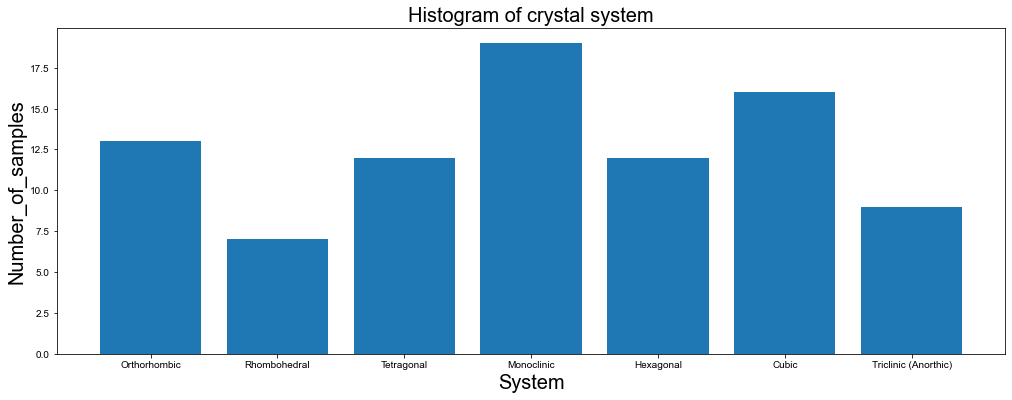

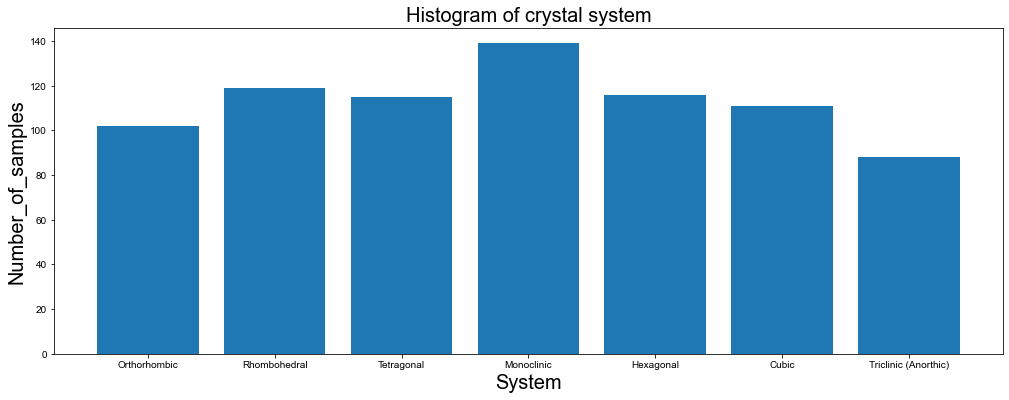

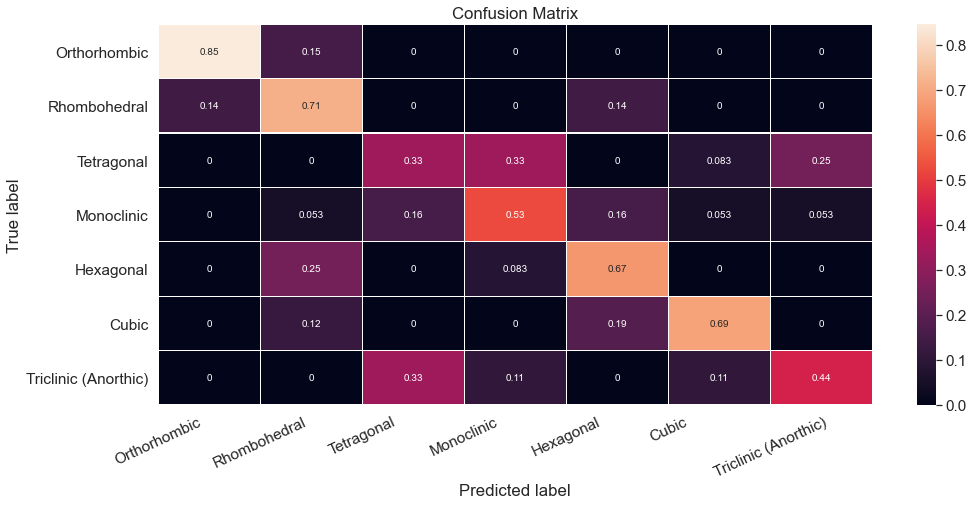

In [42]:
calculations_with_chart(dtc,X_num_height_ten,Y_ohe,0.1,4848)






In [44]:
cross_val_scores(svc ,X_num_height_ten, Y_ohe)

0.53 accuracy with a standard deviation of 0.04
0.53  f1 with a standard deviation of 0.04
['algoritm']


In [45]:
cross_val_scores(rfc ,X_num_height_ten, Y_ohe)

0.57 accuracy with a standard deviation of 0.06
0.58  f1 with a standard deviation of 0.07
['algoritm']


In [46]:
cross_val_scores(dtc ,X_num_height_ten, Y_ohe)

0.50 accuracy with a standard deviation of 0.05
0.49  f1 with a standard deviation of 0.06
['algoritm']


In [81]:
cross_val_scores(gnb ,X_num_height_ten, Y_ohe)

0.36 accuracy with a standard deviation of 0.06
0.31  f1 with a standard deviation of 0.07
['algoritm']


In [82]:
cross_val_scores(knn ,X_num_height_ten, Y_ohe)

0.47 accuracy with a standard deviation of 0.06
0.46  f1 with a standard deviation of 0.06
['algoritm']


In [83]:
cross_val_scores(lrg ,X_num_height_ten, Y_ohe)

C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

0.52 accuracy with a standard deviation of 0.06
0.52  f1 with a standard deviation of 0.05
['algoritm']


C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [84]:
cross_val_scores(mlp ,X_num_height_ten, Y_ohe)

C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users

0.53 accuracy with a standard deviation of 0.06
0.51  f1 with a standard deviation of 0.06
['algoritm']


C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [85]:
cross_val_scores(rcc ,X_num_height_ten, Y_ohe)

0.47 accuracy with a standard deviation of 0.05
0.45  f1 with a standard deviation of 0.05
['algoritm']


In [86]:
cross_val_scores(rc ,X_num_height_ten, Y_ohe)

0.47 accuracy with a standard deviation of 0.05
0.45  f1 with a standard deviation of 0.05
['algoritm']


In [87]:
cross_val_scores(nc ,X_num_height_ten, Y_ohe)

0.48 accuracy with a standard deviation of 0.07
0.47  f1 with a standard deviation of 0.07
['algoritm']


In [88]:
cross_val_scores(rnc ,X_num_height_ten, Y_ohe)

nan accuracy with a standard deviation of nan
nan  f1 with a standard deviation of nan
['algoritm']


C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Admin\.conda\envs\pythonProject\lib\site

In [89]:
cross_val_scores(lrcv,X_num_height_ten, Y_ohe)

C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

0.52 accuracy with a standard deviation of 0.06
0.51  f1 with a standard deviation of 0.06
['algoritm']


In [90]:
cross_val_scores(lsvc,X_num_height_ten, Y_ohe)

C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\svm\_base.py:985: Con

0.52 accuracy with a standard deviation of 0.06
0.51  f1 with a standard deviation of 0.05
['algoritm']


C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [91]:
cross_val_scores(etc ,X_num_height_ten, Y_ohe)

0.44 accuracy with a standard deviation of 0.03
0.43  f1 with a standard deviation of 0.06
['algoritm']


In [92]:
cross_val_scores(lda ,X_num_height_ten, Y_ohe)

0.49 accuracy with a standard deviation of 0.05
0.48  f1 with a standard deviation of 0.06
['algoritm']


In [93]:
cross_val_scores(lp ,X_num_height_ten, Y_ohe)

C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\

0.45 accuracy with a standard deviation of 0.05
0.45  f1 with a standard deviation of 0.06
['algoritm']


C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


In [94]:
cross_val_scores(ls ,X_num_height_ten, Y_ohe)

C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\

0.45 accuracy with a standard deviation of 0.05
0.46  f1 with a standard deviation of 0.05
['algoritm']


C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


In [95]:
cross_val_scores(qda ,X_num_height_ten, Y_ohe)

0.37 accuracy with a standard deviation of 0.05
0.30  f1 with a standard deviation of 0.07
['algoritm']


C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Varia

In [96]:
cross_val_scores(bnb ,X_num_height_ten, Y_ohe)

0.51 accuracy with a standard deviation of 0.06
0.50  f1 with a standard deviation of 0.06
['algoritm']


Accuracy for Decision Tree: 0.6288659793814433


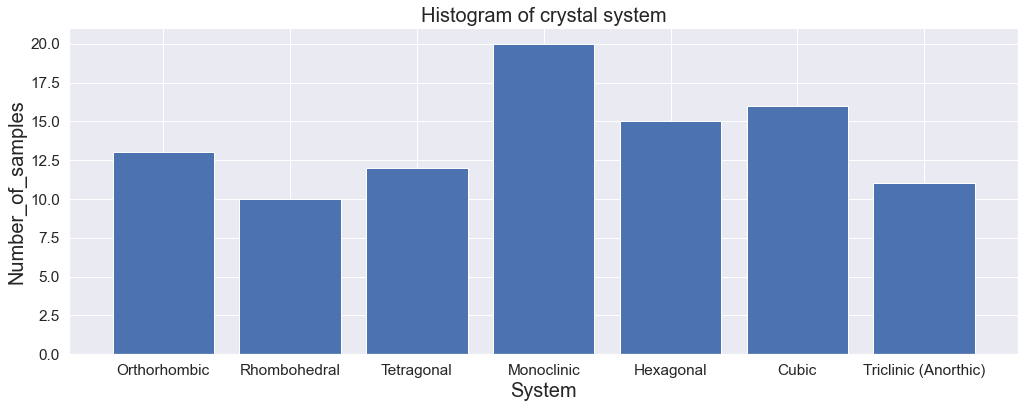

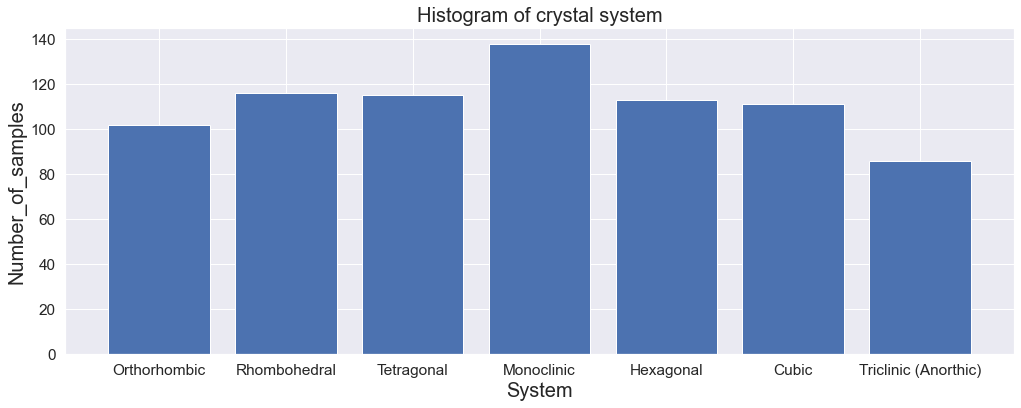

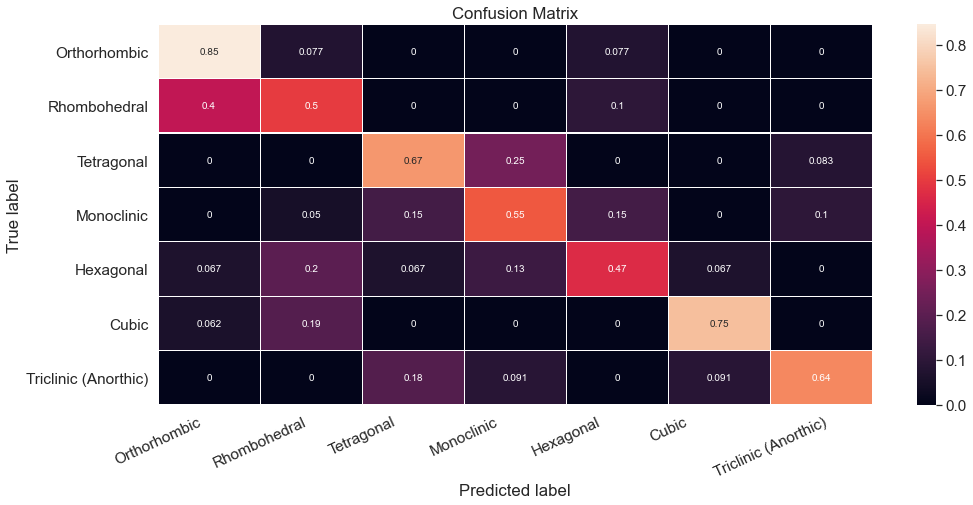

In [109]:
calculations_with_chart(svc ,X_num_height_ten, Y_ohe)

Accuracy for Decision Tree: 0.6494845360824743


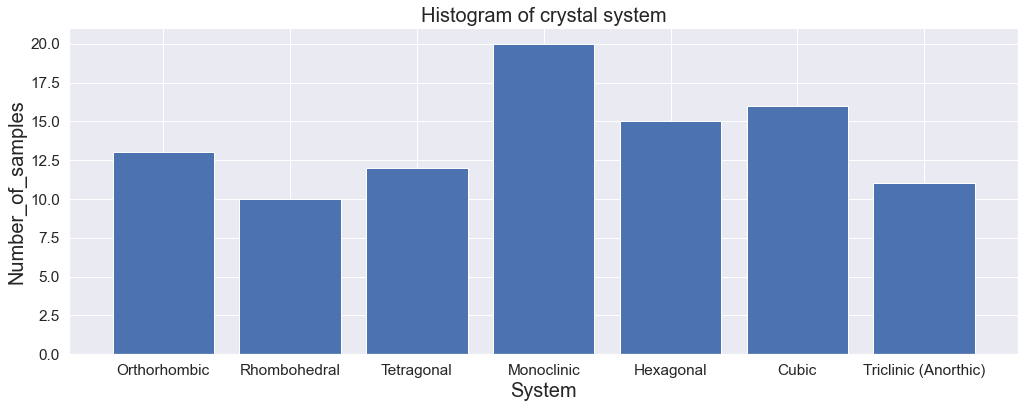

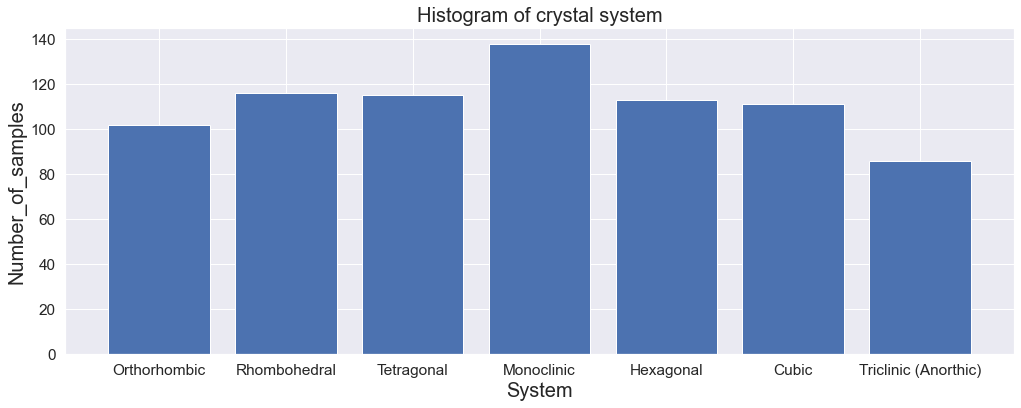

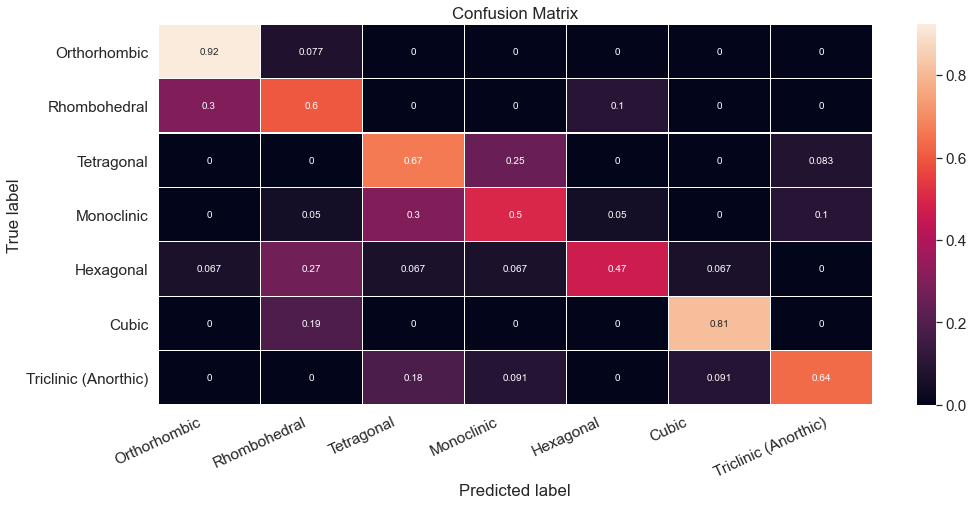

In [110]:
calculations_with_chart(rfc ,X_num_height_ten, Y_ohe)

Accuracy for Decision Tree: 0.6185567010309279


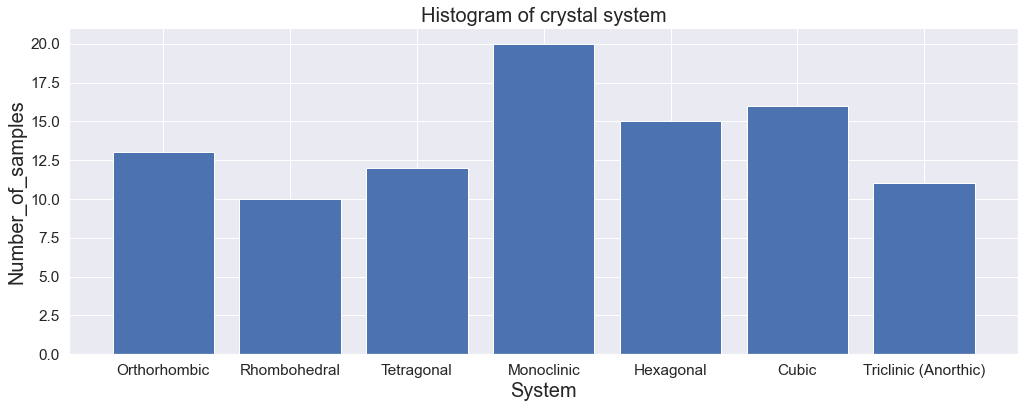

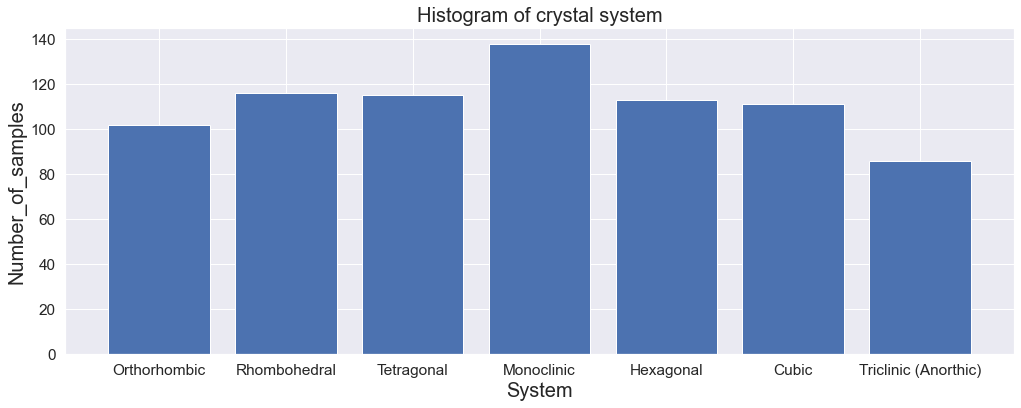

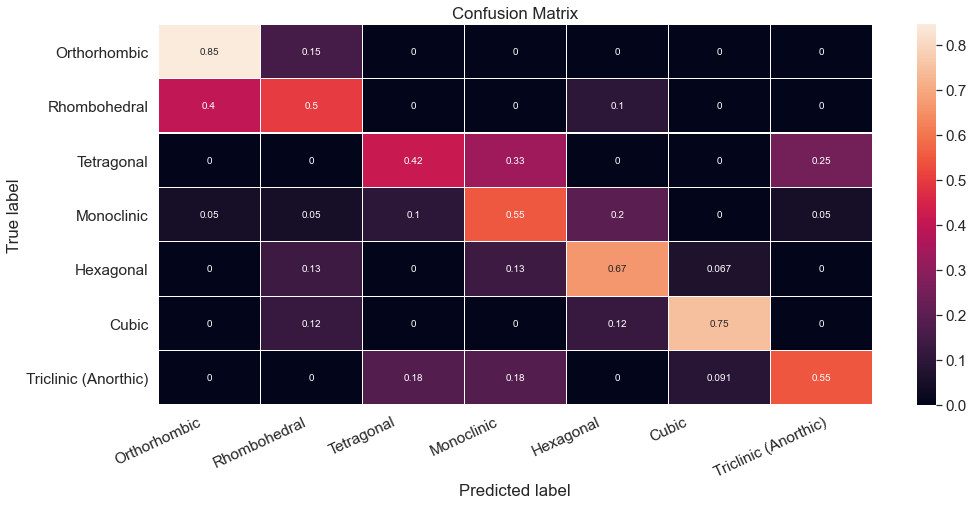

In [111]:
calculations_with_chart(dtc ,X_num_height_ten, Y_ohe)

Accuracy for Decision Tree: 0.41237113402061853


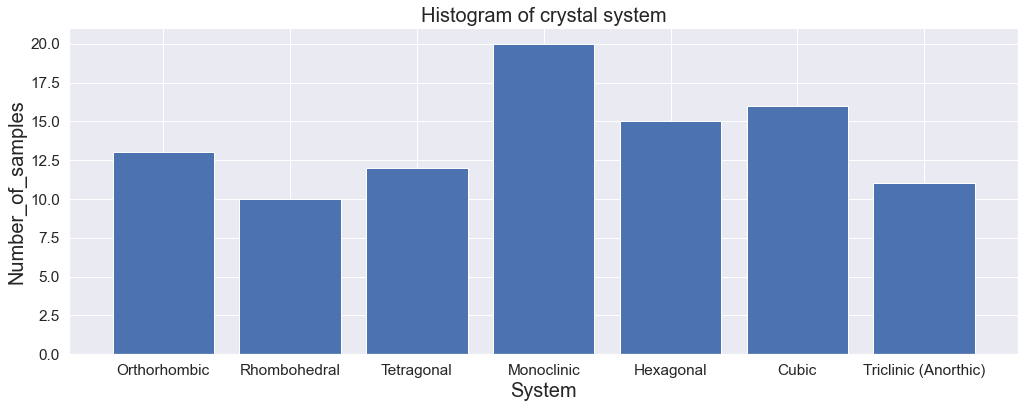

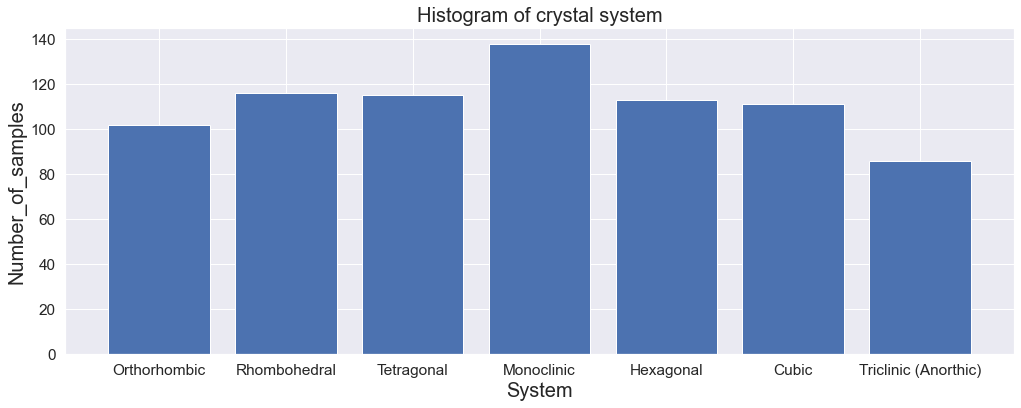

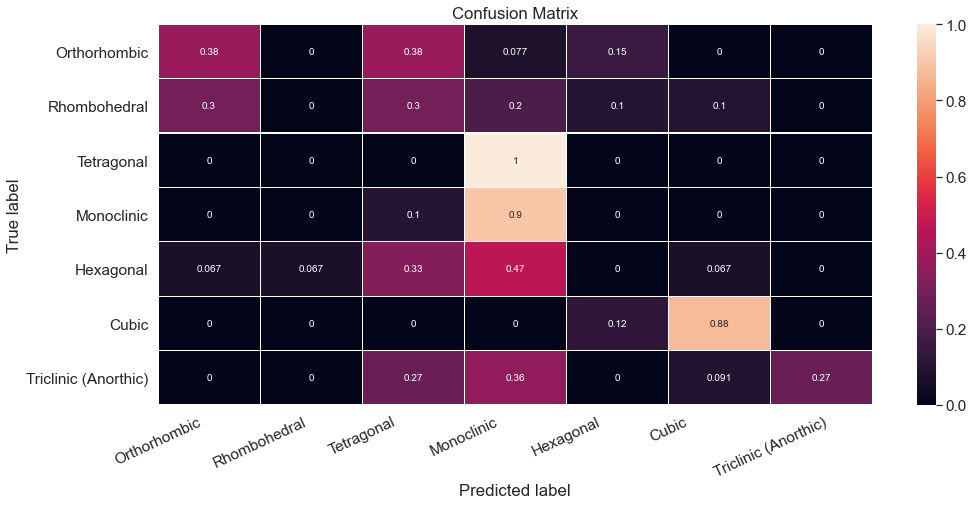

In [112]:
calculations_with_chart(gnb ,X_num_height_ten, Y_ohe)

Accuracy for Decision Tree: 0.5051546391752577


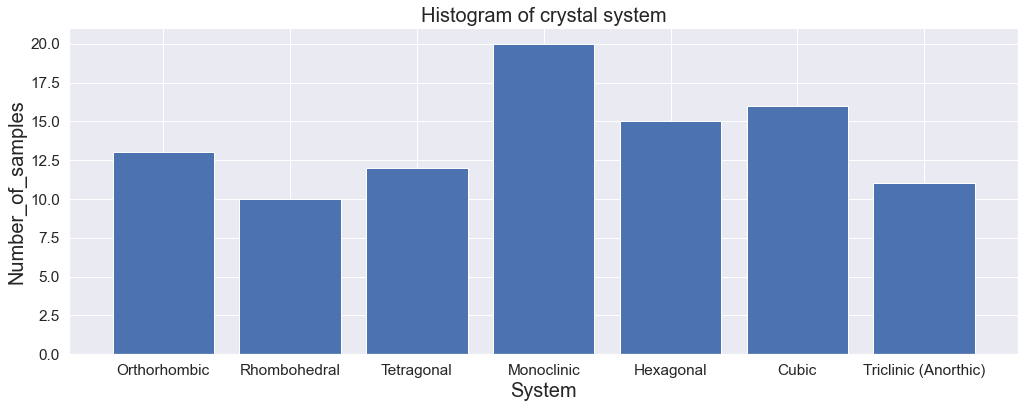

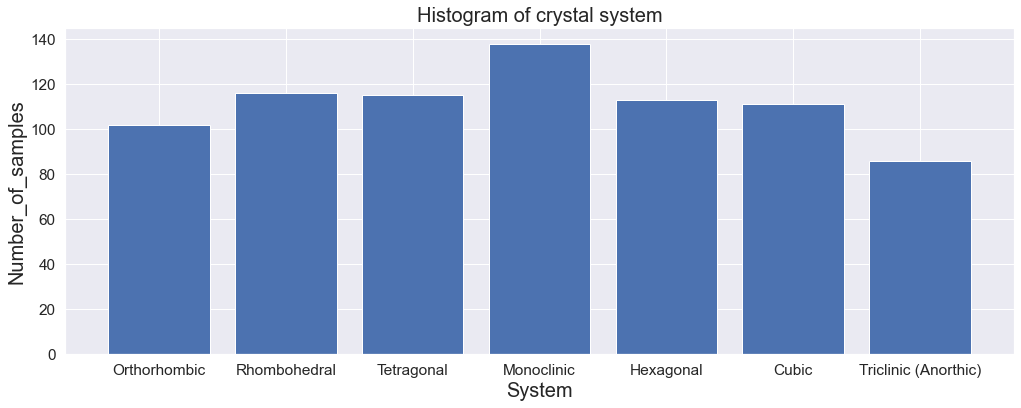

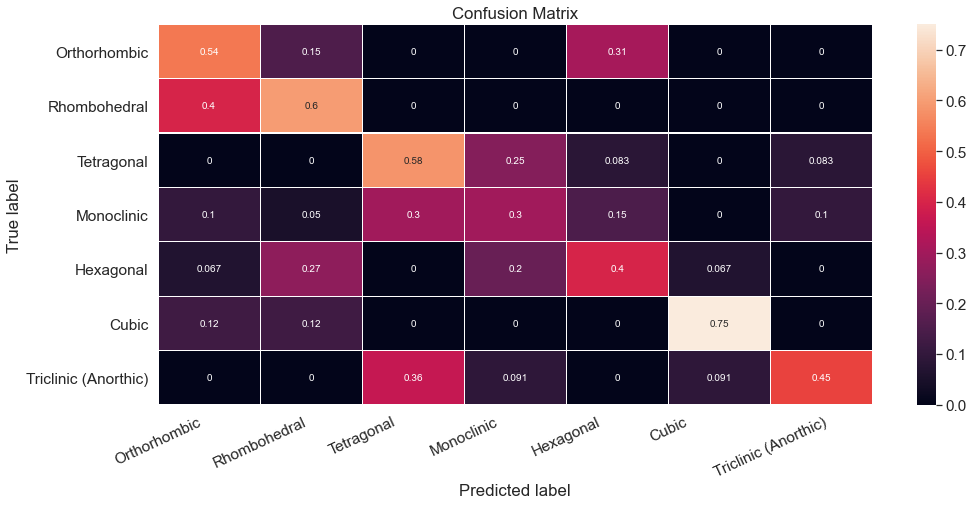

In [113]:
calculations_with_chart(knn ,X_num_height_ten, Y_ohe)

C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Decision Tree: 0.5979381443298969


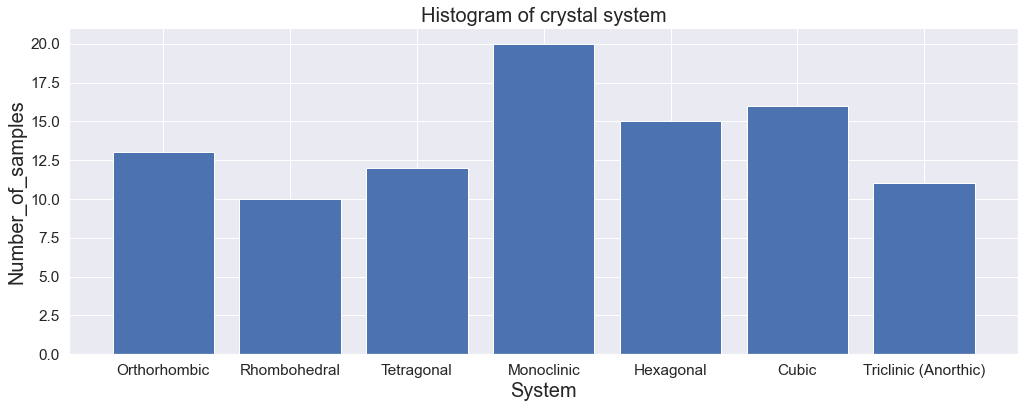

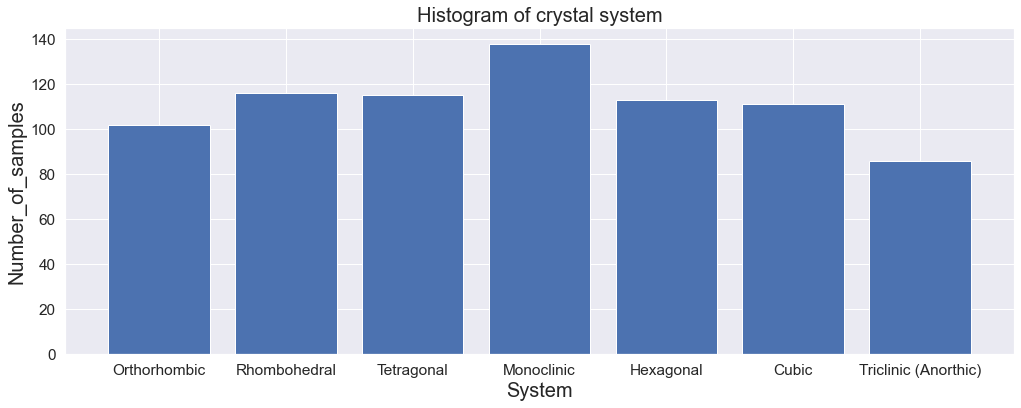

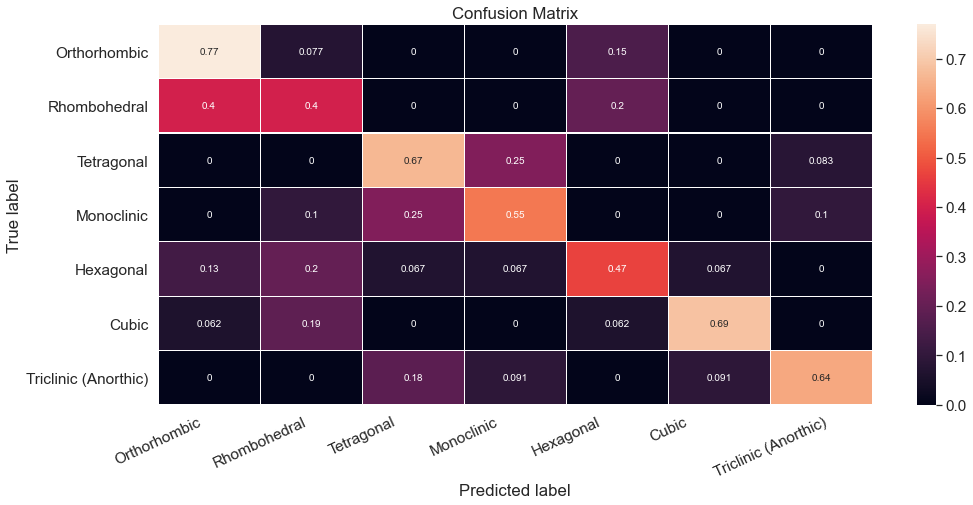

In [114]:
calculations_with_chart(lrg ,X_num_height_ten, Y_ohe)

C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for Decision Tree: 0.6082474226804123


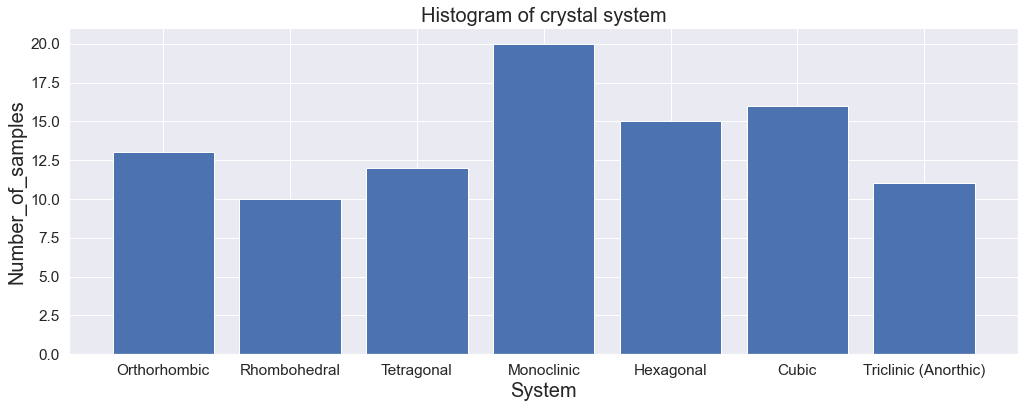

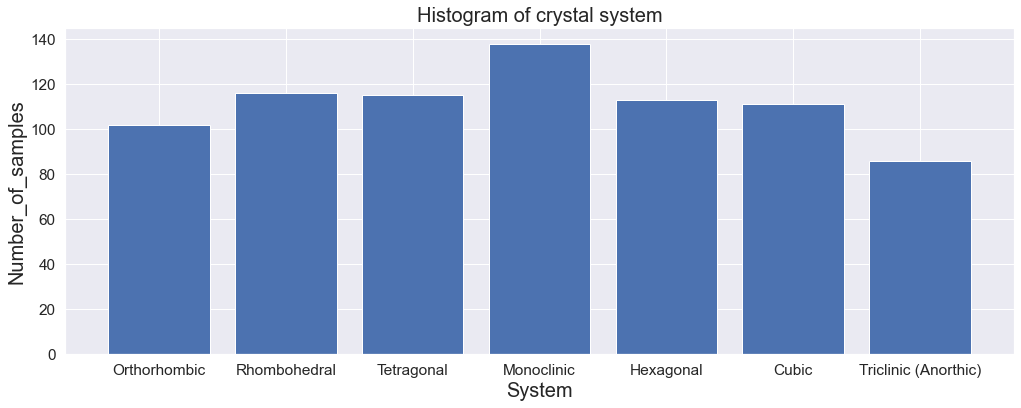

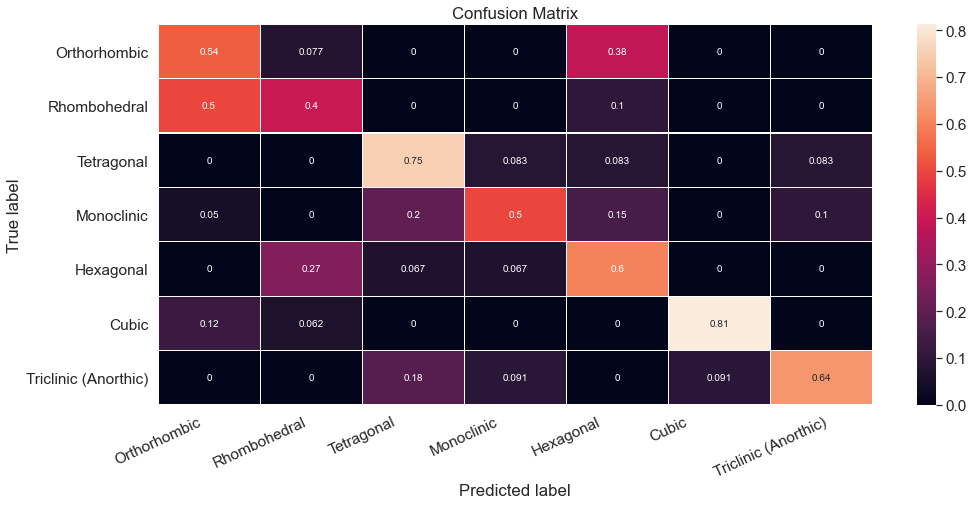

In [115]:
calculations_with_chart(mlp ,X_num_height_ten, Y_ohe)

Accuracy for Decision Tree: 0.5154639175257731


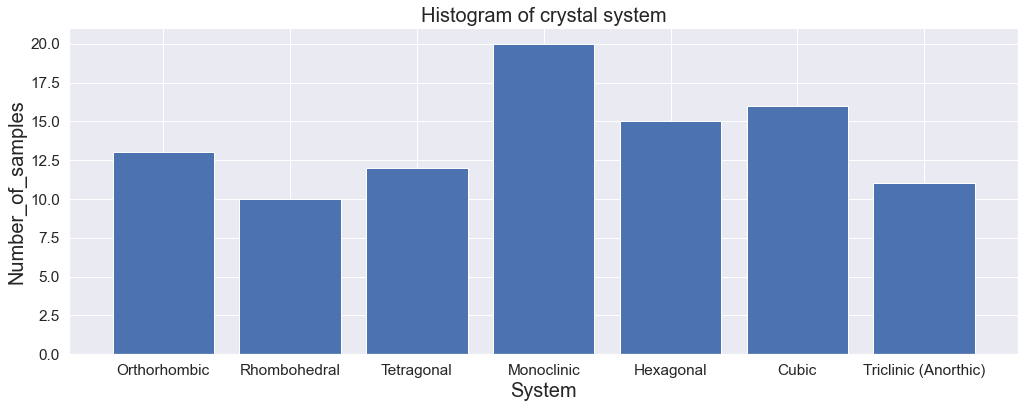

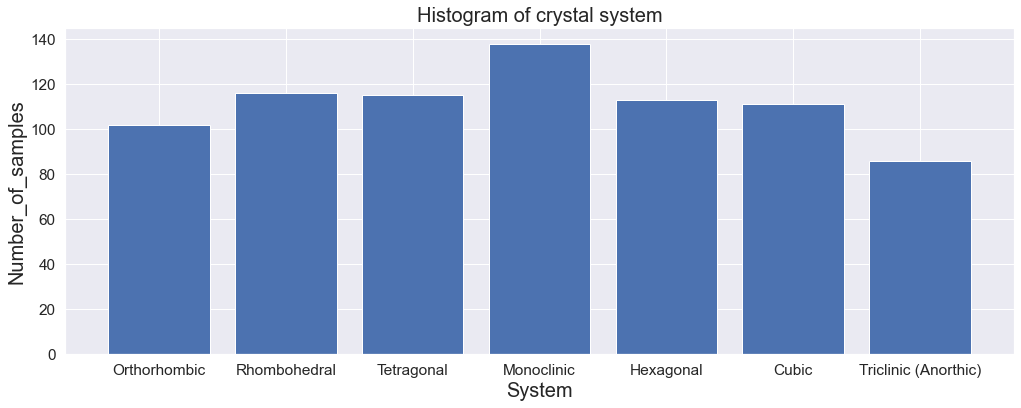

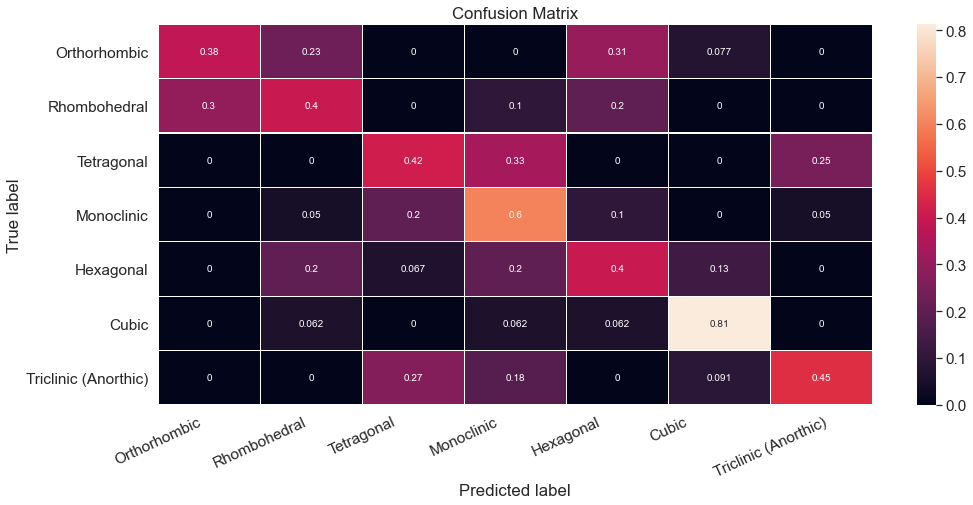

In [116]:
calculations_with_chart(rcc ,X_num_height_ten, Y_ohe)

Accuracy for Decision Tree: 0.5257731958762887


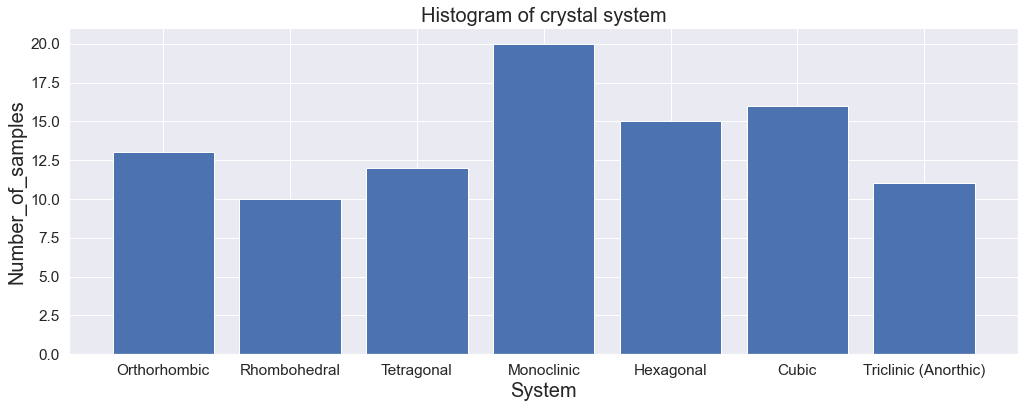

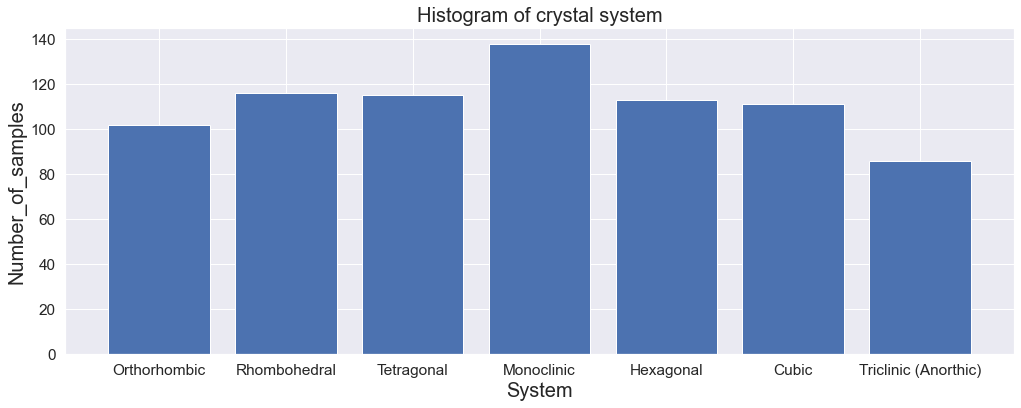

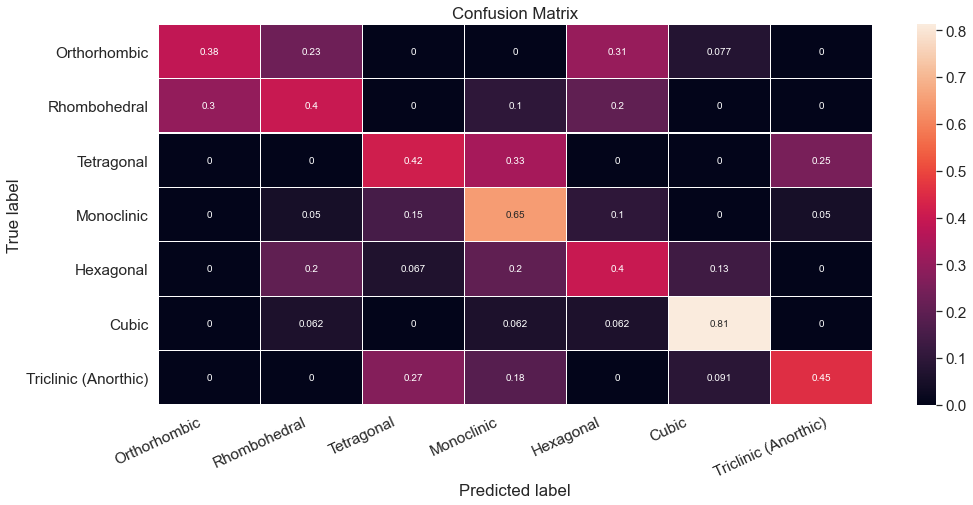

In [117]:
calculations_with_chart(rc ,X_num_height_ten, Y_ohe)

Accuracy for Decision Tree: 0.5670103092783505


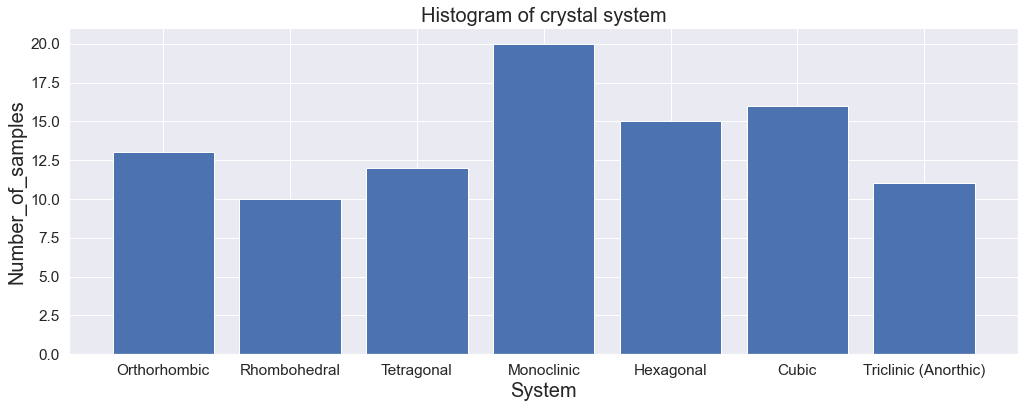

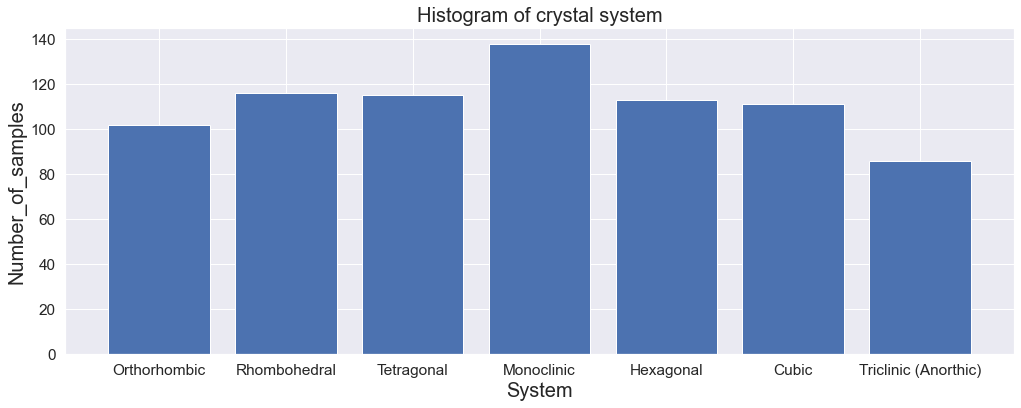

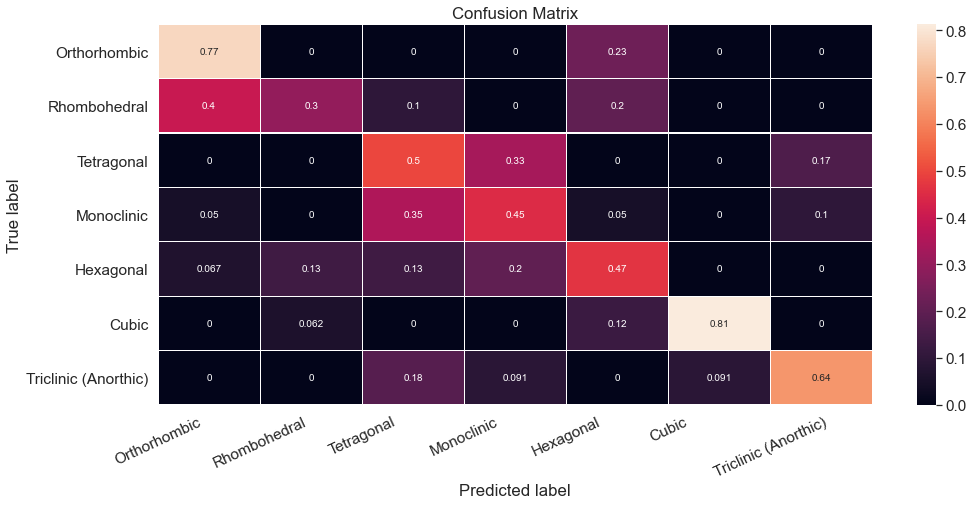

In [118]:
calculations_with_chart(nc ,X_num_height_ten, Y_ohe)

In [119]:
calculations_with_chart(rnc ,X_num_height_ten, Y_ohe)

ValueError: No neighbors found for test samples array([ 0,  1,  2,  3,  4,  5,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 70, 71, 73, 74, 76, 77, 79, 80, 81, 82,
       83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96], dtype=int64), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.

C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Accuracy for Decision Tree: 0.5876288659793815


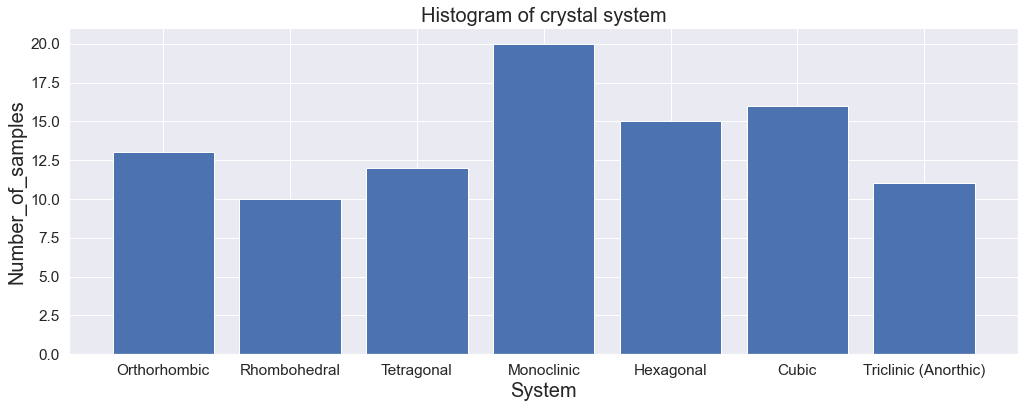

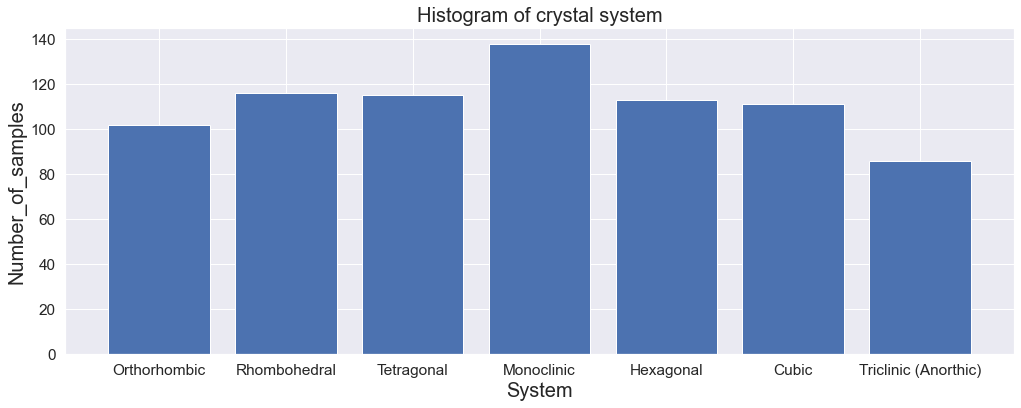

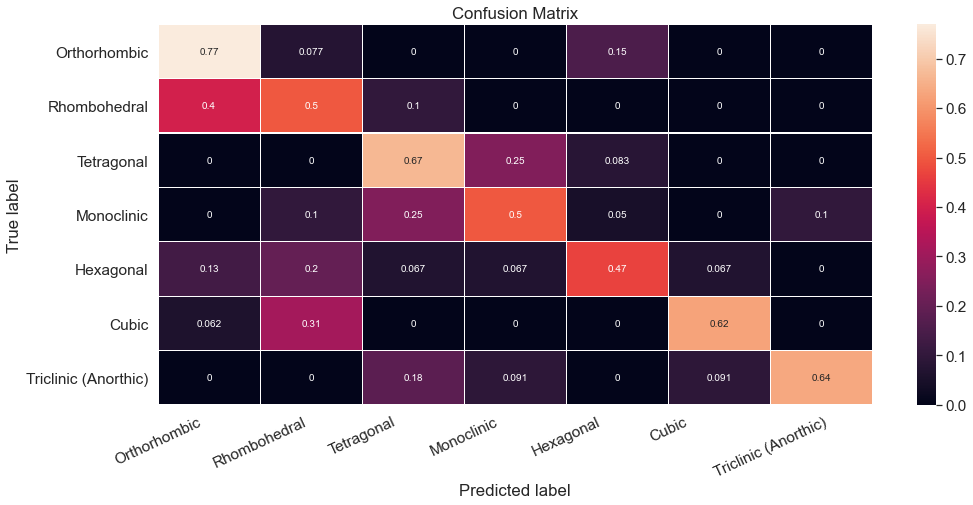

In [120]:
calculations_with_chart(lrcv,X_num_height_ten, Y_ohe)

C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy for Decision Tree: 0.5876288659793815


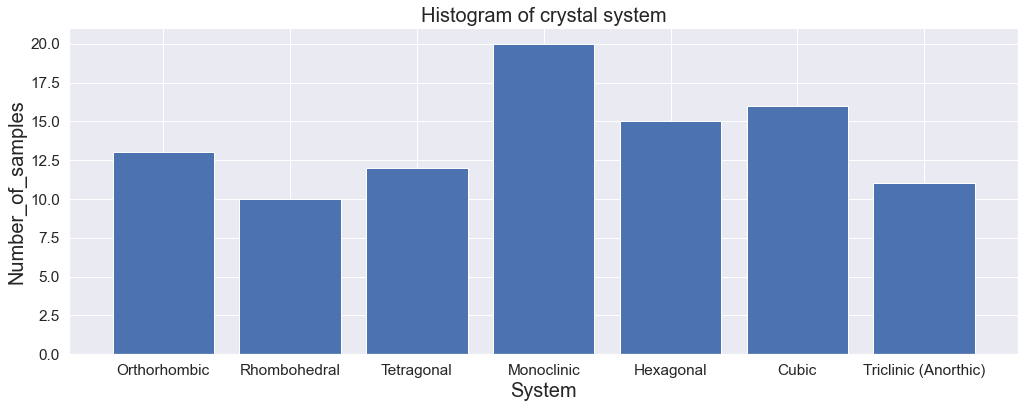

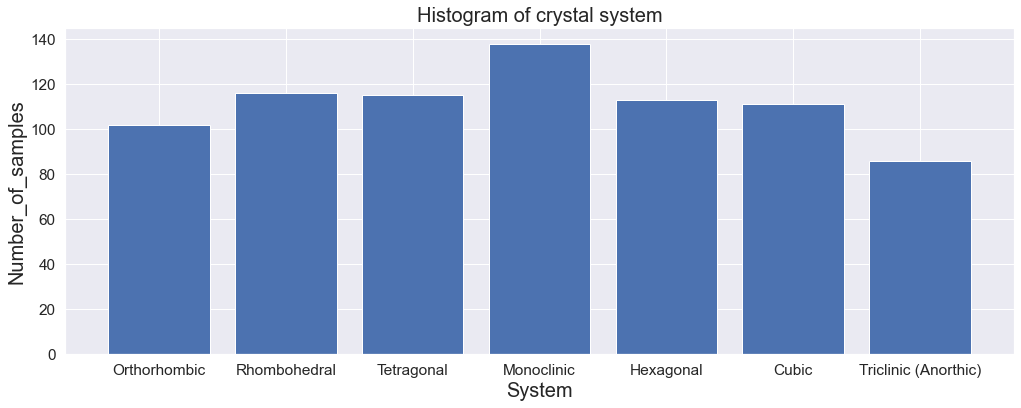

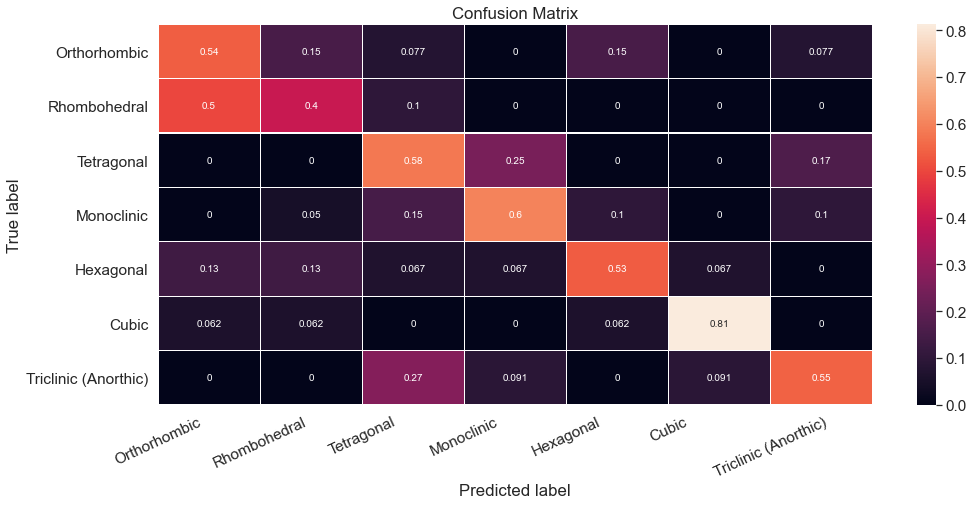

In [121]:
calculations_with_chart(lsvc,X_num_height_ten, Y_ohe,0.11,4848)

Accuracy for Decision Tree: 0.44329896907216493


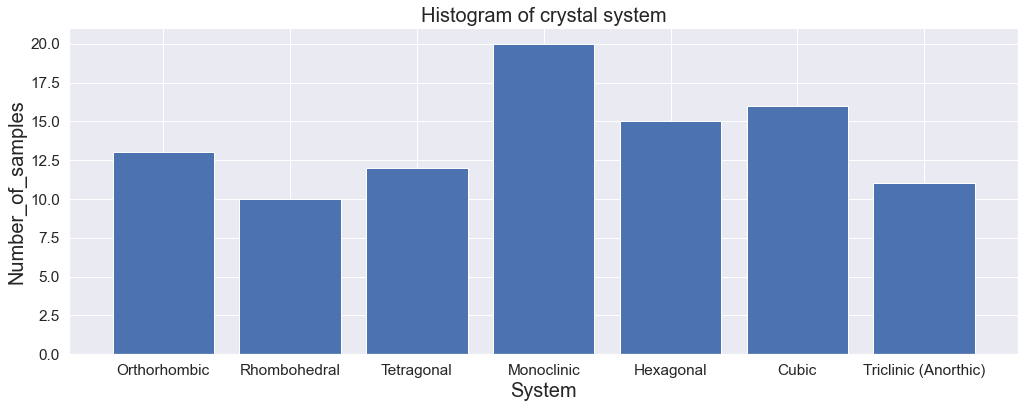

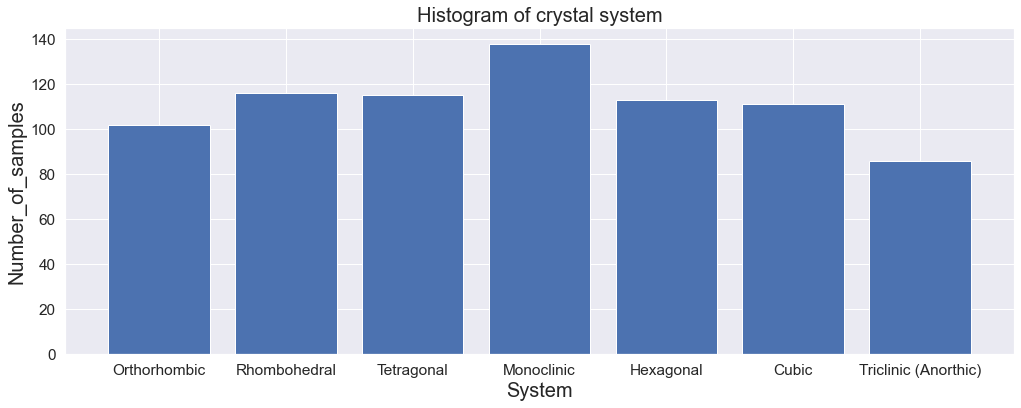

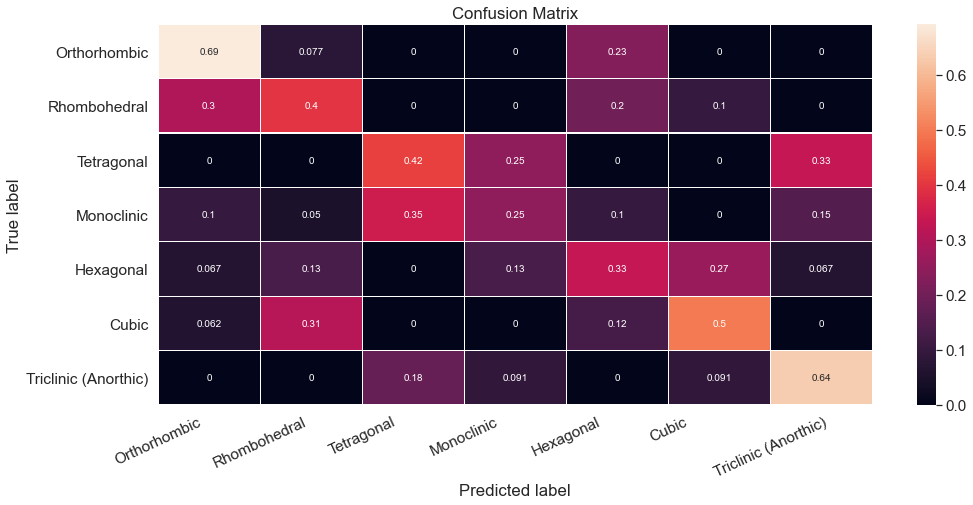

In [122]:
calculations_with_chart(etc ,X_num_height_ten, Y_ohe,0.11,4848)

Accuracy for Decision Tree: 0.5773195876288659


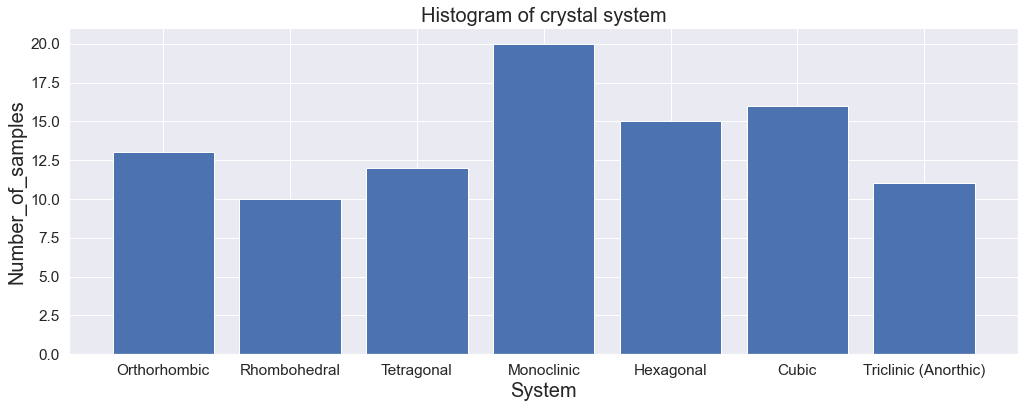

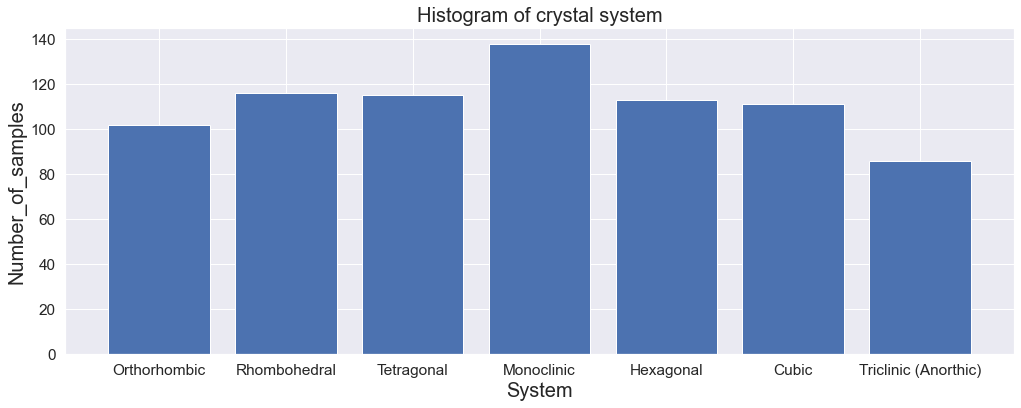

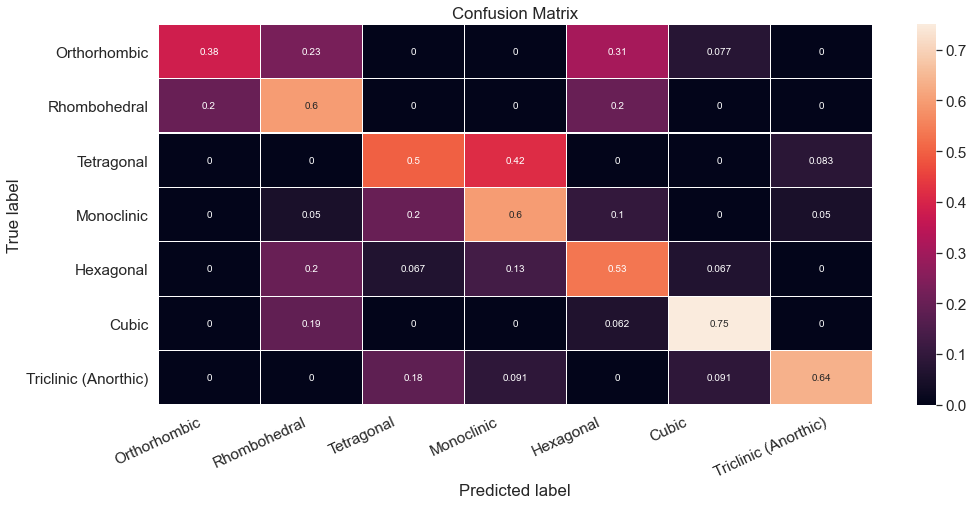

In [123]:
calculations_with_chart(lda ,X_num_height_ten, Y_ohe,0.11,4848)

In [ ]:
calculations_with_chart(lp ,X_num_height_ten, Y_ohe,0.11,4848)

C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Accuracy for Decision Tree: 0.4948453608247423


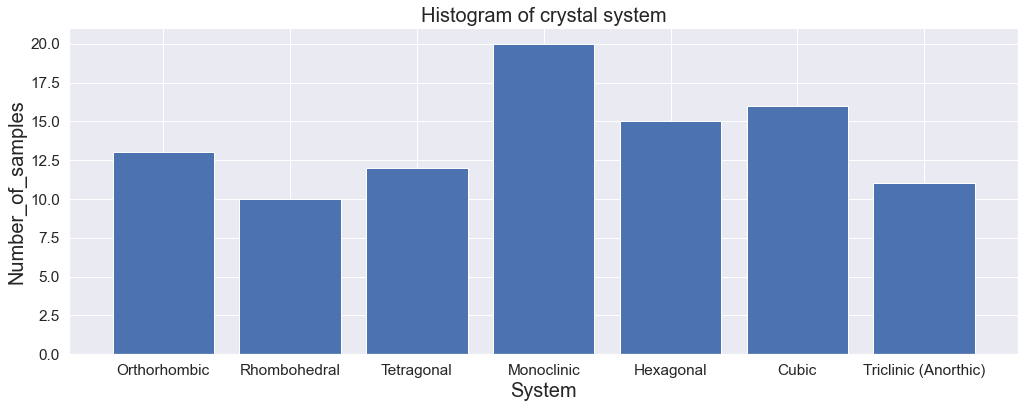

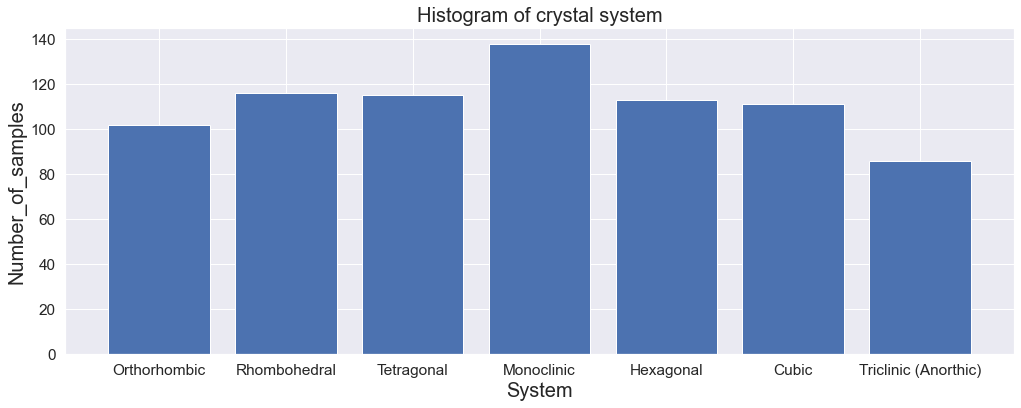

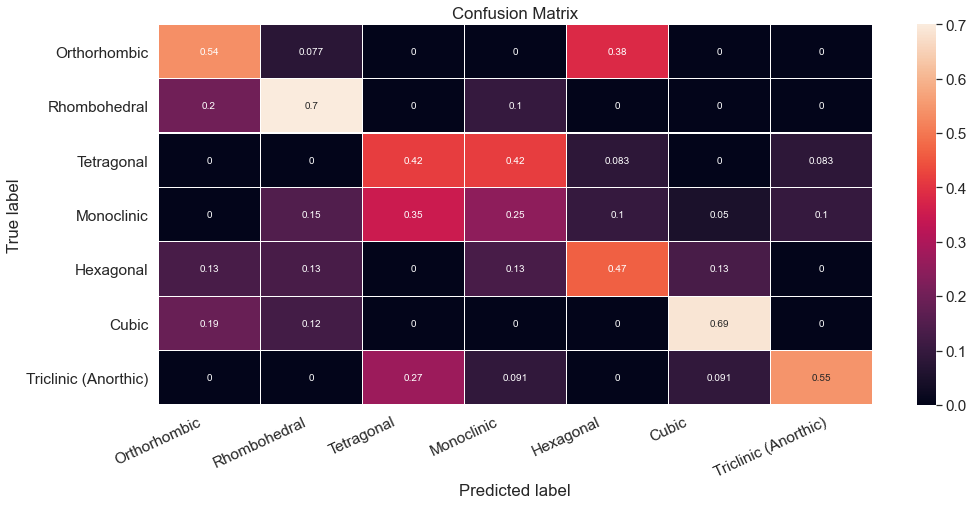

In [124]:
calculations_with_chart(ls ,X_num_height_ten, Y_ohe,0.11,4848)

C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy for Decision Tree: 0.5051546391752577


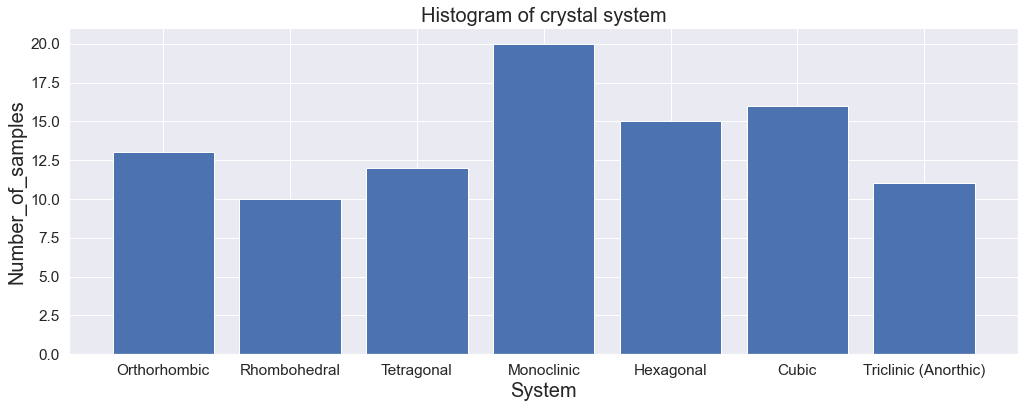

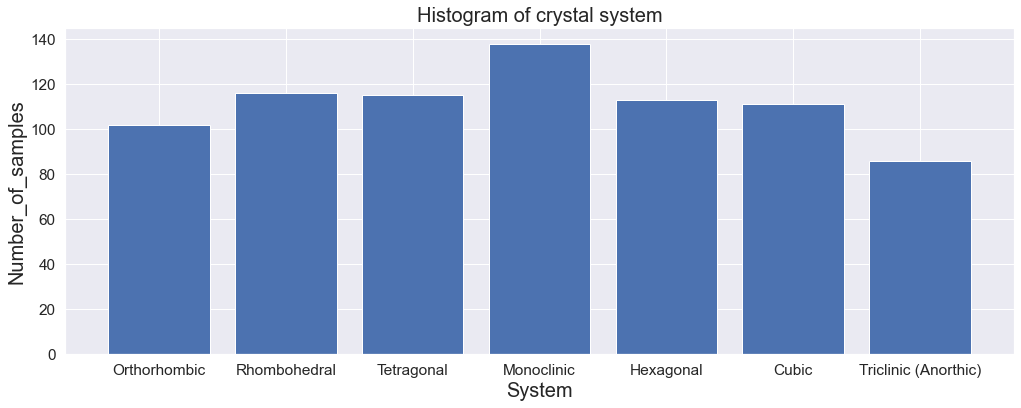

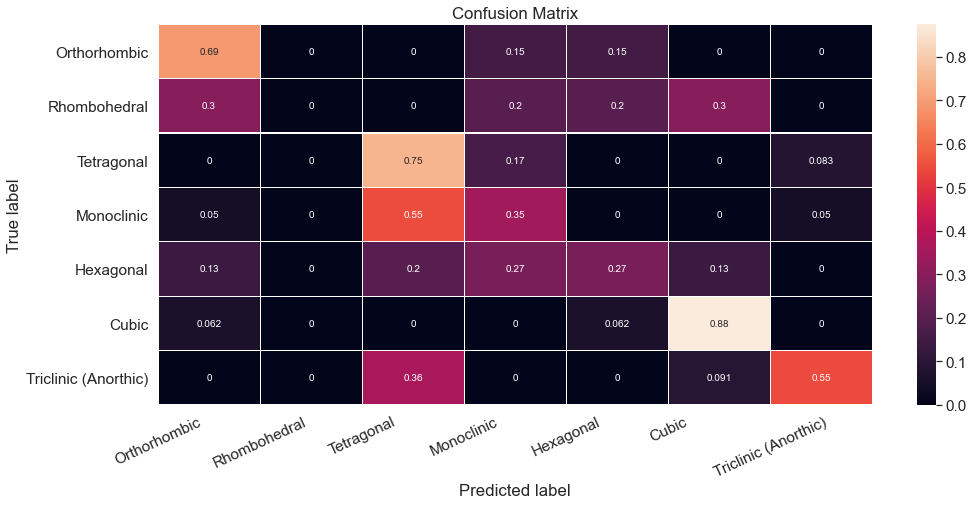

In [125]:
calculations_with_chart(qda ,X_num_height_ten, Y_ohe,0.11,4848)

Accuracy for Decision Tree: 0.5257731958762887


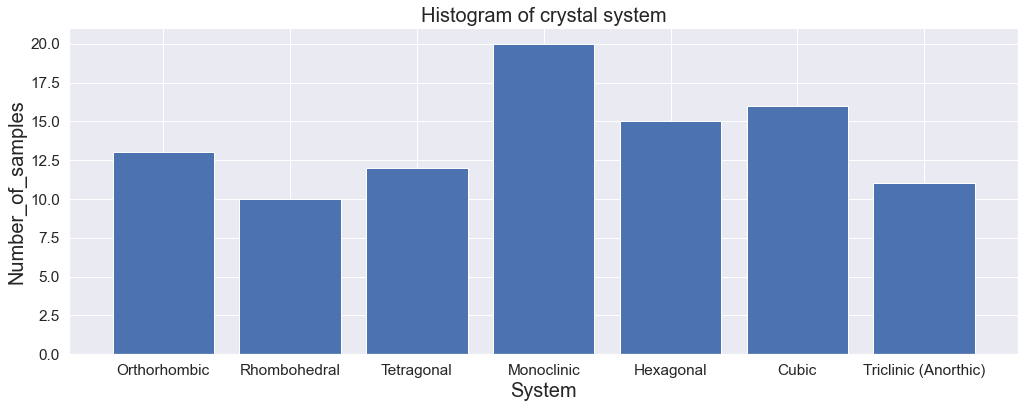

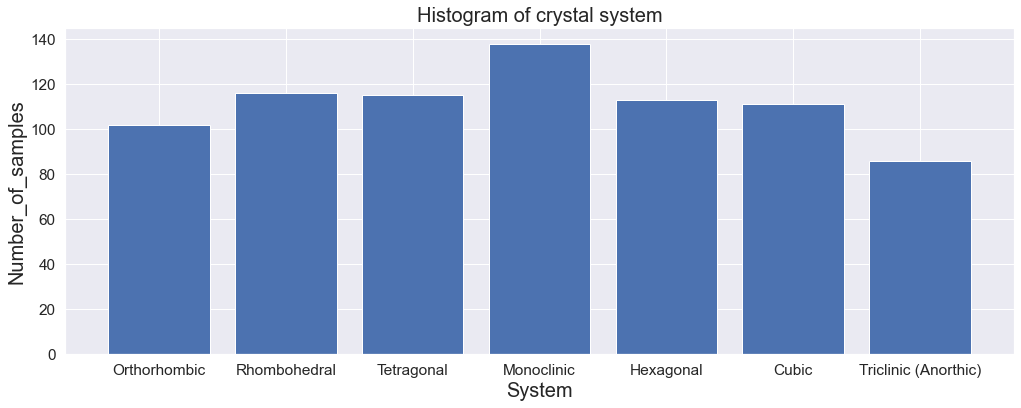

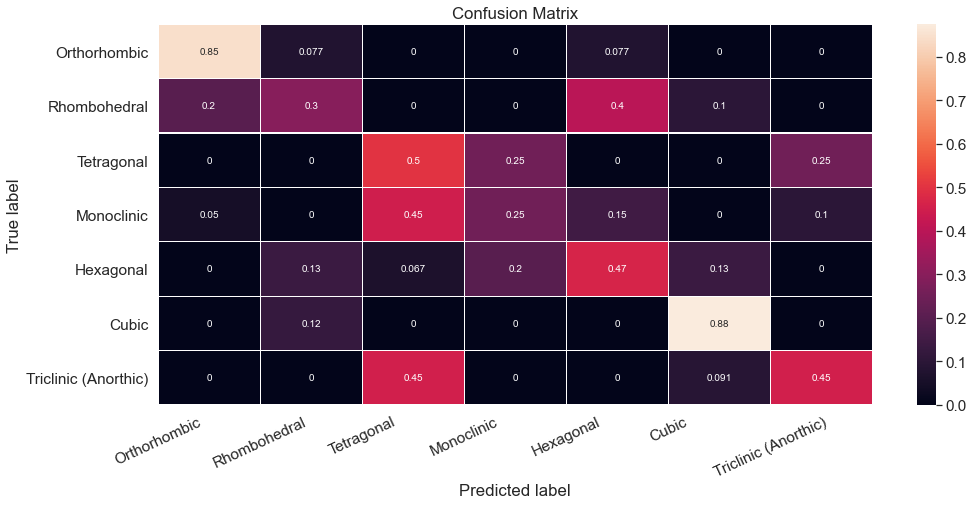

In [126]:
calculations_with_chart(bnb ,X_num_height_ten, Y_ohe,0.11,4848)


In [127]:
for i in X_standarized_list:
    cross_val_scores(rfc,i,Y_ohe)


0.58 accuracy with a standard deviation of 0.07
0.58  f1 with a standard deviation of 0.06
['algoritm']
0.57 accuracy with a standard deviation of 0.06
0.56  f1 with a standard deviation of 0.05
['algoritm']
0.59 accuracy with a standard deviation of 0.06
0.57  f1 with a standard deviation of 0.05
['algoritm']
0.57 accuracy with a standard deviation of 0.06
0.58  f1 with a standard deviation of 0.06
['algoritm']
0.49 accuracy with a standard deviation of 0.05
0.49  f1 with a standard deviation of 0.05
['algoritm']
0.45 accuracy with a standard deviation of 0.05
0.44  f1 with a standard deviation of 0.05
['algoritm']


In [128]:
for i in X_normal_list:
    cross_val_scores(rfc,i,Y_ohe)


0.58 accuracy with a standard deviation of 0.06
0.59  f1 with a standard deviation of 0.06
['algoritm']
0.57 accuracy with a standard deviation of 0.07
0.56  f1 with a standard deviation of 0.05
['algoritm']
0.58 accuracy with a standard deviation of 0.05
0.58  f1 with a standard deviation of 0.06
['algoritm']
0.59 accuracy with a standard deviation of 0.07
0.57  f1 with a standard deviation of 0.06
['algoritm']
0.49 accuracy with a standard deviation of 0.03
0.49  f1 with a standard deviation of 0.04
['algoritm']
0.45 accuracy with a standard deviation of 0.06
0.44  f1 with a standard deviation of 0.05
['algoritm']


In [129]:
for i in X_PCA_list:
    cross_val_scores(rfc,i,Y_ohe)


0.56 accuracy with a standard deviation of 0.05
0.57  f1 with a standard deviation of 0.05
['algoritm']
0.55 accuracy with a standard deviation of 0.04
0.55  f1 with a standard deviation of 0.04
['algoritm']
0.50 accuracy with a standard deviation of 0.07
0.51  f1 with a standard deviation of 0.07
['algoritm']
0.51 accuracy with a standard deviation of 0.07
0.50  f1 with a standard deviation of 0.08
['algoritm']
0.44 accuracy with a standard deviation of 0.02
0.42  f1 with a standard deviation of 0.03
['algoritm']
0.41 accuracy with a standard deviation of 0.04
0.40  f1 with a standard deviation of 0.02
['algoritm']


In [131]:
for i in X_normal_list:
    cross_val_scores(svc,i,Y_ohe)


0.53 accuracy with a standard deviation of 0.04
0.52  f1 with a standard deviation of 0.05
['algoritm']
0.56 accuracy with a standard deviation of 0.05
0.56  f1 with a standard deviation of 0.05
['algoritm']
0.51 accuracy with a standard deviation of 0.06
0.51  f1 with a standard deviation of 0.06
['algoritm']
0.48 accuracy with a standard deviation of 0.05
0.48  f1 with a standard deviation of 0.06
['algoritm']
0.38 accuracy with a standard deviation of 0.04
0.37  f1 with a standard deviation of 0.04
['algoritm']
0.38 accuracy with a standard deviation of 0.04
0.35  f1 with a standard deviation of 0.03
['algoritm']


In [134]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

In [ ]:
base_accuracy = evaluate(rfc, X_standarized_list[2], Y_ohe, )


ValueError: Unable to coerce to Series, length must be 7: given 878

In [ ]:
grid_accuracy = evaluate(best_grid, X_standarized_list[2], Y_ohe)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

In [139]:
best_grid

RandomForestClassifier(max_depth=100, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=200)

In [140]:
grid_search.best_params_


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [141]:
rfc_best  = RandomForestClassifier(max_depth=100, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=200)



In [142]:
rfc_best.fit(X_standarized_list[2], Y_ohe)

RandomForestClassifier(max_depth=100, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=200)

In [143]:
cross_val_scores(rfc_best, X_standarized_list[2], Y_ohe)

0.57 accuracy with a standard deviation of 0.07
0.57  f1 with a standard deviation of 0.06
['algoritm']


In [55]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [90,92,94,96,98,100,102,104,106,108],
    'max_features': [3,4,5,6,7],
    'min_samples_leaf': [3, 4, 5,6,7,8,],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [150, 200, 250]
}


In [51]:
from skopt import BayesSearchCV



In [58]:
def bayes_search(algoritm,X,y, test_size= 0.11, random_state=4848):
    y_ = np.array(y)
    new_y = [0]*len(y_)
    for i in range(len(y_)):
        new_y[i] = np.argmax(y_[i])
    X_train_new,X_test_new, y_train_new, y_test_new = train_test_split(X,new_y,test_size= test_size, random_state=random_state)
    bayes_search = BayesSearchCV(algoritm,param_grid,cv=5)
    bayes_search.fit(X_train_new, y_train_new)
    print("val. score: %s" % bayes_search.best_score_)
    print("test score: %s" % bayes_search.score(X_test_new, y_test_new))
    print("best params: %s" % str(bayes_search.best_params_))

In [59]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [90,92,94,96,98,100,102,104,106,108],
    'max_features': [3,4,5,6,7],
    'min_samples_leaf': [3, 4, 5,6,7,8,],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [150, 200, 250]
}

bayes_search(rfc, X_standarized_list[2], Y_ohe)

C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


val. score: 0.6338559529642331
test score: 0.6907216494845361
best params: OrderedDict([('bootstrap', False), ('max_depth', 96), ('max_features', 5), ('min_samples_leaf', 3), ('min_samples_split', 8), ('n_estimators', 250)])


In [60]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [95,96,97],
    'max_features': [5],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [5,6,7,8],
    'n_estimators': [230,240,250,260,270]
}
bayes_search(rfc, X_standarized_list[2], Y_ohe)


C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


val. score: 0.6325820676139148
test score: 0.6597938144329897
best params: OrderedDict([('bootstrap', False), ('max_depth', 96), ('max_features', 5), ('min_samples_leaf', 1), ('min_samples_split', 5), ('n_estimators', 260)])


In [64]:
rfc_best_one = RandomForestClassifier(bootstrap=False, max_depth=96,max_features=5, min_samples_leaf=3, min_samples_split=8,n_estimators= 250)
cross_val_scores(rfc_best_one, X_standarized_list[2], Y_ohe)

0.58 accuracy with a standard deviation of 0.06
0.58  f1 with a standard deviation of 0.06
['algoritm']


In [62]:
cross_val_scores(rfc, X_standarized_list[2], Y_ohe)


0.58 accuracy with a standard deviation of 0.06
0.58  f1 with a standard deviation of 0.07
['algoritm']


In [66]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [96],
    'max_features': [5],
    'min_samples_leaf': [1],
    'min_samples_split': [8,9,10,11,12,13],
    'n_estimators': [260,300,400,500,1000]
}
bayes_search(rfc, X_standarized_list[2], Y_ohe)


C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this p

val. score: 0.6376776090151887
test score: 0.6494845360824743
best params: OrderedDict([('bootstrap', False), ('max_depth', 96), ('max_features', 5), ('min_samples_leaf', 1), ('min_samples_split', 10), ('n_estimators', 1000)])


In [67]:
rfc_best_two = RandomForestClassifier(bootstrap=False, max_depth=96,max_features=5, min_samples_leaf=1, min_samples_split=5,n_estimators= 260)
cross_val_scores(rfc_best_two, X_standarized_list[2], Y_ohe)



0.58 accuracy with a standard deviation of 0.06
0.57  f1 with a standard deviation of 0.06
['algoritm']


Accuracy for Decision Tree: 0.6391752577319587


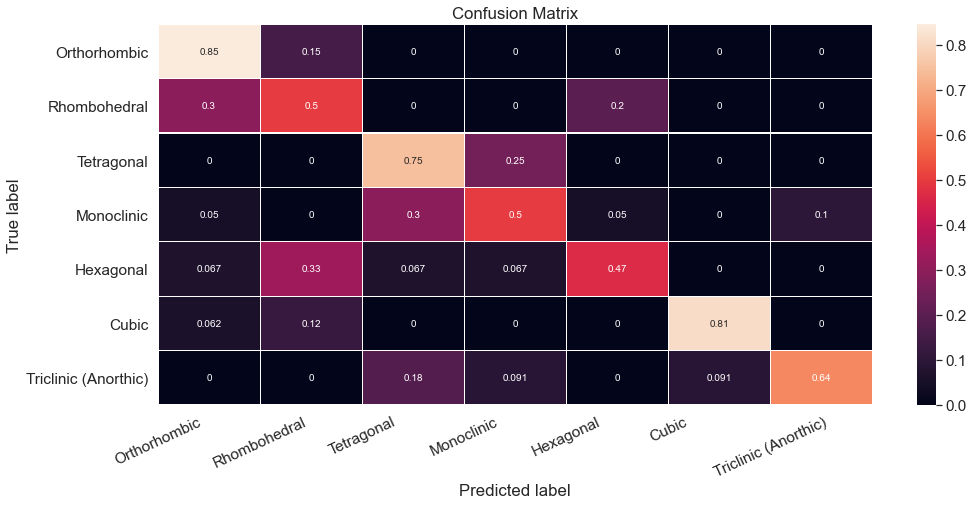

In [72]:
calculations_with_chart(rfc, X_standarized_list[2], Y_ohe, ohe=False)

Accuracy for Decision Tree: 0.6701030927835051


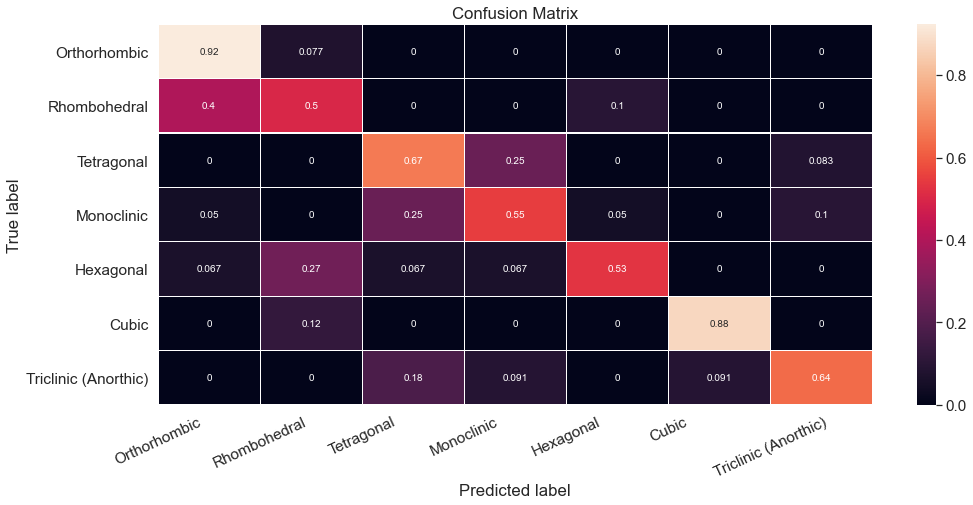

In [73]:
calculations_with_chart(rfc_best_one, X_standarized_list[2], Y_ohe, ohe=False)

Accuracy for Decision Tree: 0.6597938144329897


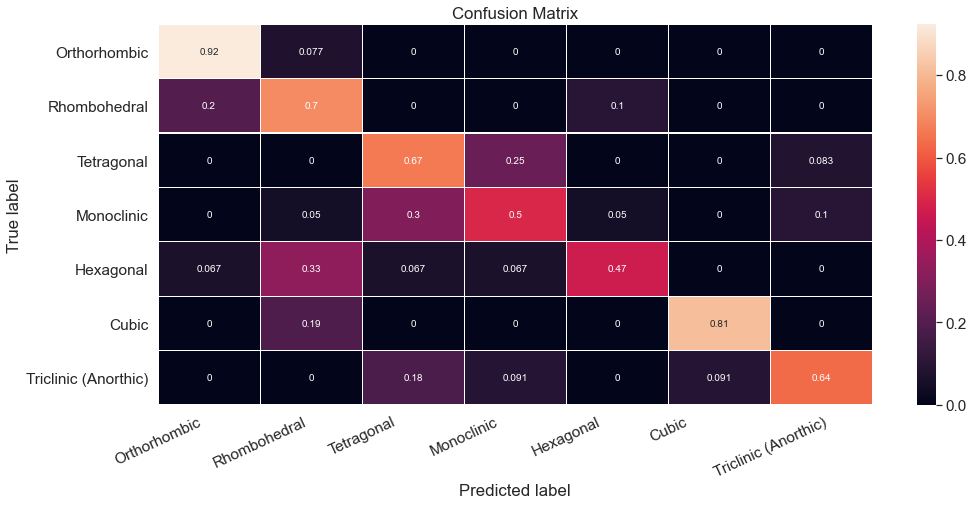

In [74]:
calculations_with_chart(rfc_best_two, X_standarized_list[2], Y_ohe, ohe=False)


In [75]:
rfc_best_thre = RandomForestClassifier(bootstrap=False, max_depth=96,max_features=5, min_samples_leaf=1, min_samples_split=10,n_estimators= 1000)
cross_val_scores(rfc_best_thre, X_standarized_list[2], Y_ohe)



0.58 accuracy with a standard deviation of 0.06
0.58  f1 with a standard deviation of 0.06
['algoritm']


Accuracy for Decision Tree: 0.6597938144329897


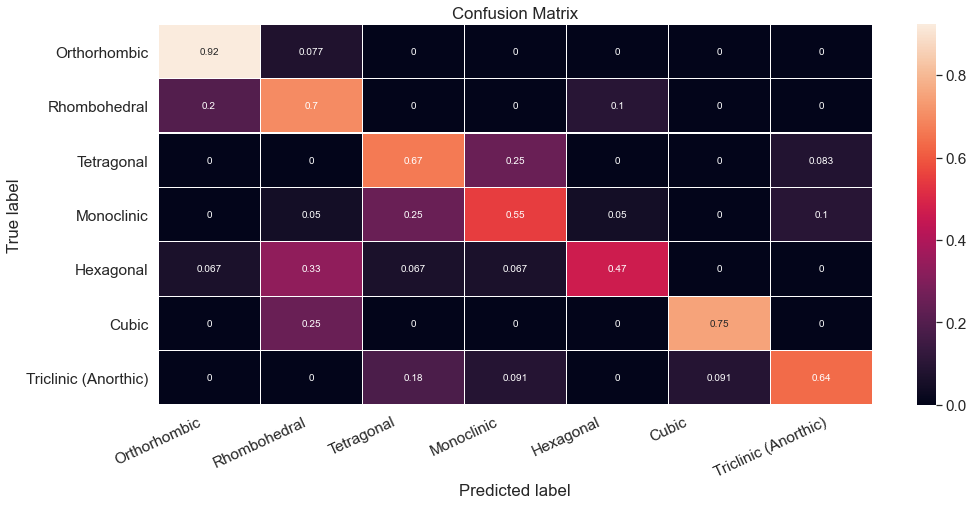

In [76]:
calculations_with_chart(rfc_best_thre, X_standarized_list[2], Y_ohe, ohe=False)



In [77]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [96],
    'max_features': [5],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [8,10],
    'n_estimators': [250,900,1000,1500,2000]
}
bayes_search(rfc, X_standarized_list[2], Y_ohe)




C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this p

val. score: 0.6312836844683979
test score: 0.6494845360824743
best params: OrderedDict([('bootstrap', False), ('max_depth', 96), ('max_features', 5), ('min_samples_leaf', 1), ('min_samples_split', 8), ('n_estimators', 2000)])


In [85]:
rfc_best_four = RandomForestClassifier(bootstrap=False, max_depth=96,max_features=5, min_samples_leaf=1, min_samples_split=8,n_estimators= 2000)
cross_val_scores(rfc_best_four, X_standarized_list[2], Y_ohe)

0.58 accuracy with a standard deviation of 0.05
0.58  f1 with a standard deviation of 0.06
['algoritm']


In [86]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [96],
    'max_features': [5],
    'min_samples_leaf': [1,],
    'min_samples_split': [8],
    'n_estimators': [1800,2000,3000]
}
bayes_search(rfc, X_standarized_list[2], Y_ohe)


C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this p

val. score: 0.6313000163318635
test score: 0.6701030927835051
best params: OrderedDict([('bootstrap', False), ('max_depth', 96), ('max_features', 5), ('min_samples_leaf', 1), ('min_samples_split', 8), ('n_estimators', 2000)])


In [21]:
rfc_best_five = RandomForestClassifier(bootstrap=False, max_depth=96,max_features=5, min_samples_leaf=1, min_samples_split=8,n_estimators= 2000)
#cross_val_scores(rfc_best_five, X_standarized_list[2], Y_ohe)


Accuracy for Decision Tree: 0.6701030927835051


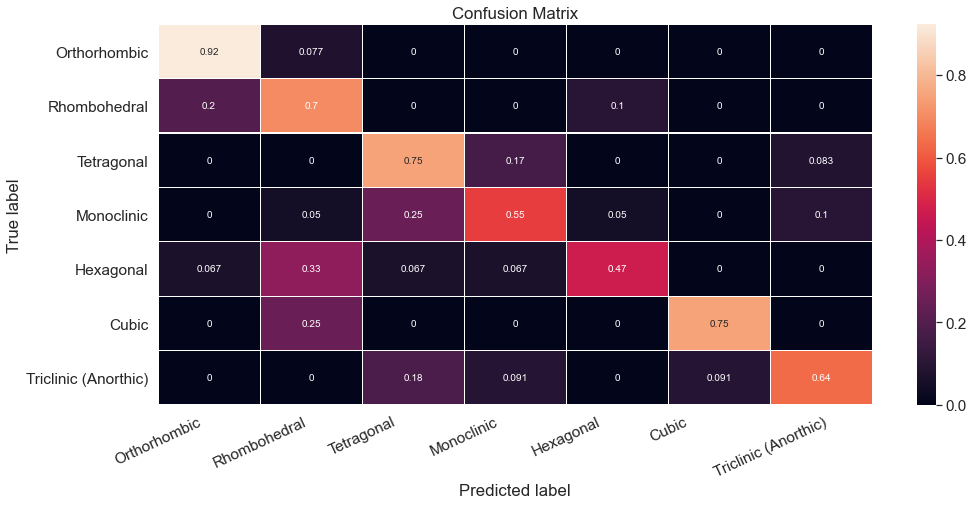

In [88]:
calculations_with_chart(rfc_best_five, X_standarized_list[2], Y_ohe, ohe=False)


In [ ]:
def bayes_searchCV(algoritm,X,y, test_size= 0.11, random_state=4848):
    y_ = np.array(y)
    new_y = [0]*len(y_)
    for i in range(len(y_)):
        new_y[i] = np.argmax(y_[i])
    X_train_new,X_test_new, y_train_new, y_test_new = train_test_split(X,new_y,test_size= test_size, random_state=random_state)
    bayes_search = BayesSearchCV(algoritm,param_grid,cv=5)
    bayes_search.fit(X_train_new, y_train_new)
    print("val. score: %s" % bayes_search.best_score_)
    print("test score: %s" % bayes_search.score(X_test_new, y_test_new))
    print("best params: %s" % str(bayes_search.best_params_))

In [51]:
for i in X_normal_list:
    cross_val_scores(rfc_best_five,i,Y_ohe)

0.58663 accuracy with a standard deviation of 0.04733
0.58907  f1 with a standard deviation of 0.04421
0.56840 accuracy with a standard deviation of 0.04185
0.57533  f1 with a standard deviation of 0.04665
0.57979 accuracy with a standard deviation of 0.05631
0.58102  f1 with a standard deviation of 0.06340
0.57980 accuracy with a standard deviation of 0.05831
0.58498  f1 with a standard deviation of 0.05964
0.48760 accuracy with a standard deviation of 0.05615
0.48697  f1 with a standard deviation of 0.05485
0.45681 accuracy with a standard deviation of 0.05405
0.44985  f1 with a standard deviation of 0.04987


In [52]:
for i in X_standarized_list:
    cross_val_scores(rfc_best_five,i,Y_ohe)

0.58777 accuracy with a standard deviation of 0.04694
0.58612  f1 with a standard deviation of 0.04699
0.56841 accuracy with a standard deviation of 0.04340
0.56870  f1 with a standard deviation of 0.04773
0.57981 accuracy with a standard deviation of 0.05848
0.57926  f1 with a standard deviation of 0.05781
0.58208 accuracy with a standard deviation of 0.06400
0.58337  f1 with a standard deviation of 0.06275
0.48873 accuracy with a standard deviation of 0.05486
0.48612  f1 with a standard deviation of 0.05775
0.45681 accuracy with a standard deviation of 0.05748
0.45187  f1 with a standard deviation of 0.05012


Accuracy for Decision Tree: 0.6494845360824743


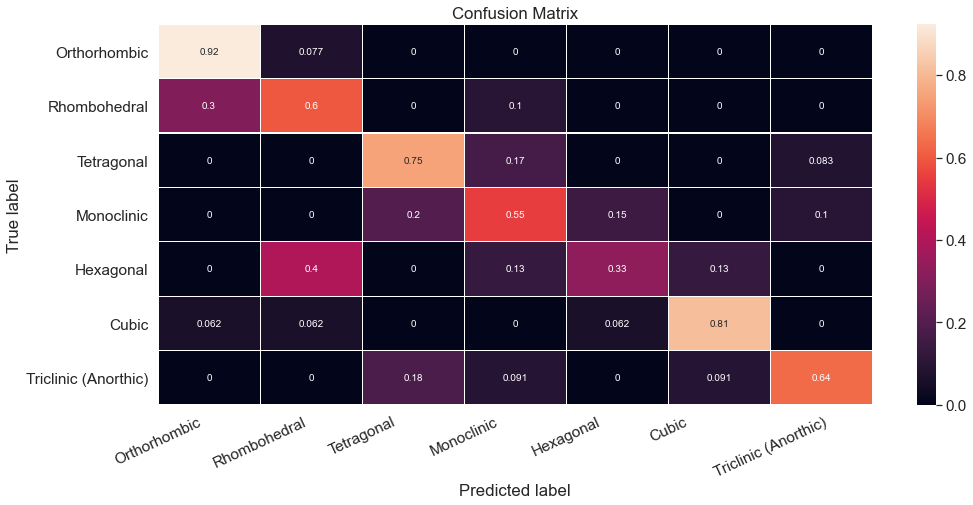

In [53]:
calculations_with_chart(rfc_best_five, X_standarized_list[0], Y_ohe, ohe=False)


In [54]:
for i in X_PCA_list:
    cross_val_scores(rfc_best_five,i,Y_ohe)


0.56613 accuracy with a standard deviation of 0.05182
0.56132  f1 with a standard deviation of 0.05524
0.52747 accuracy with a standard deviation of 0.06434
0.53732  f1 with a standard deviation of 0.06624
0.50014 accuracy with a standard deviation of 0.07097
0.49671  f1 with a standard deviation of 0.07050
0.50356 accuracy with a standard deviation of 0.07630
0.49176  f1 with a standard deviation of 0.07464
0.42596 accuracy with a standard deviation of 0.02786
0.41505  f1 with a standard deviation of 0.02430
0.39749 accuracy with a standard deviation of 0.03464
0.37730  f1 with a standard deviation of 0.04314


In [55]:
range_of_two_theta_two_deegres = []

for i in range(5,172,2):
    range_of_two_theta_two_deegres.append(i)

In [62]:
X_num_of_reflexes = []
for i in X['chart']:
    num_of_reflexes = [0]*len(range_of_two_theta_two_deegres)
    for j in i:
        #print(j[0])
        if 0<j[0] and j[0]<= range_of_two_theta_two_deegres[0]:
            num_of_reflexes[0]+=1
        else:
            for k in range(1,len(range_of_two_theta_two_deegres)):
                if range_of_two_theta_two_deegres[k-1]<j[0] and j[0]<=range_of_two_theta_two_deegres[k]:
                    num_of_reflexes[k] +=1

    X_num_of_reflexes.append(num_of_reflexes)
    #print(num_of_reflexes)


In [63]:
X_num_of_reflexes_two_angle = np.array(X_num_of_reflexes)

In [64]:
X_num_two_std = sclaer.fit_transform(X_num_of_reflexes_two_angle)


In [65]:
cross_val_scores(rfc_best_five,X_num_two_std,Y_ohe)


0.59349 accuracy with a standard deviation of 0.05810
0.59446  f1 with a standard deviation of 0.05767


In [66]:
len(X_num_two_std[0])

84

In [73]:
range_of_two_theta_one_deegres = []

for i in range(5,172,1):
    range_of_two_theta_one_deegres.append(i)

In [74]:
X_num_of_reflexes = []
for i in X['chart']:
    num_of_reflexes = [0]*len(range_of_two_theta_one_deegres)
    for j in i:
        #print(j[0])
        if 0<j[0] and j[0]<= range_of_two_theta_one_deegres[0]:
            num_of_reflexes[0]+=1
        else:
            for k in range(1,len(range_of_two_theta_one_deegres)):
                if range_of_two_theta_one_deegres[k-1]<j[0] and j[0]<=range_of_two_theta_one_deegres[k]:
                    num_of_reflexes[k] +=1

    X_num_of_reflexes.append(num_of_reflexes)
    #print(num_of_reflexes)


In [75]:
X_num_of_reflexes_one_angle = np.array(X_num_of_reflexes)

In [76]:
X_num_one_std = sclaer.fit_transform(X_num_of_reflexes_one_angle)

In [77]:
cross_val_scores(rfc_best_five,X_num_one_std,Y_ohe)

0.55821 accuracy with a standard deviation of 0.05663
0.56459  f1 with a standard deviation of 0.04380


In [78]:
len(X_num_one_std[0])

167

In [79]:
range_of_two_theta_three_deegres = []

for i in range(5,172,3):
    range_of_two_theta_three_deegres.append(i)

In [80]:
X_num_of_reflexes = []
for i in X['chart']:
    num_of_reflexes = [0]*len(range_of_two_theta_three_deegres)
    for j in i:
        #print(j[0])
        if 0<j[0] and j[0]<= range_of_two_theta_three_deegres[0]:
            num_of_reflexes[0]+=1
        else:
            for k in range(1,len(range_of_two_theta_three_deegres)):
                if range_of_two_theta_three_deegres[k-1]<j[0] and j[0]<=range_of_two_theta_three_deegres[k]:
                    num_of_reflexes[k] +=1

    X_num_of_reflexes.append(num_of_reflexes)
    #print(num_of_reflexes)


In [81]:
X_num_of_reflexes_three_angle = np.array(X_num_of_reflexes)

In [82]:
X_num_three_std = sclaer.fit_transform(X_num_of_reflexes_three_angle)

In [83]:
cross_val_scores(rfc_best_five,X_num_three_std,Y_ohe)

0.59925 accuracy with a standard deviation of 0.07427
0.59973  f1 with a standard deviation of 0.07034


In [84]:
len(X_num_three_std[0])



167

In [85]:
range_of_two_theta_four_deegres = []

for i in range(5,172,4):
    range_of_two_theta_four_deegres.append(i)

In [86]:
X_num_of_reflexes = []
for i in X['chart']:
    num_of_reflexes = [0]*len(range_of_two_theta_four_deegres)
    for j in i:
        #print(j[0])
        if 0<j[0] and j[0]<= range_of_two_theta_four_deegres[0]:
            num_of_reflexes[0]+=1
        else:
            for k in range(1,len(range_of_two_theta_four_deegres)):
                if range_of_two_theta_four_deegres[k-1]<j[0] and j[0]<=range_of_two_theta_four_deegres[k]:
                    num_of_reflexes[k] +=1

    X_num_of_reflexes.append(num_of_reflexes)
    #print(num_of_reflexes)


In [87]:
X_num_of_reflexes_four_angle = np.array(X_num_of_reflexes)

In [88]:
X_num_four_std = sclaer.fit_transform(X_num_of_reflexes_four_angle)

In [94]:
cross_val_scores(rfc_best_five,X_num_four_std,Y_ohe)

0.60148 accuracy with a standard deviation of 0.06605
0.60304  f1 with a standard deviation of 0.06329


In [90]:
len(X_num_four_std[0])

42

Accuracy for Decision Tree: 0.6494845360824743


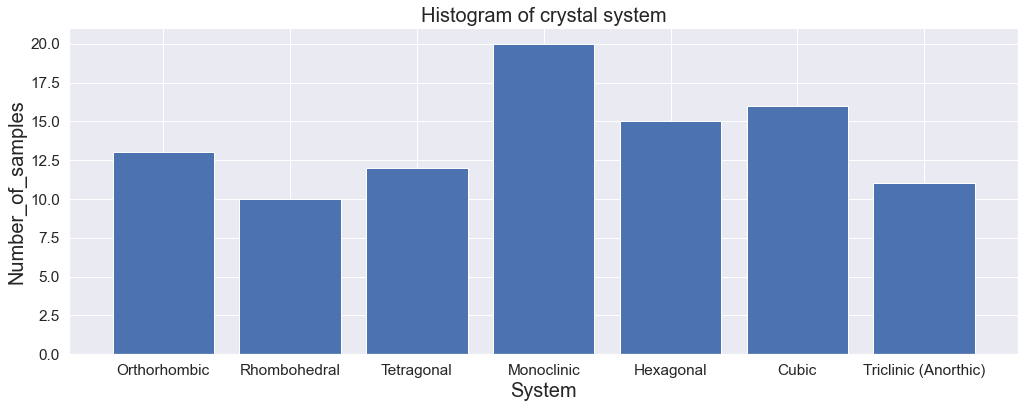

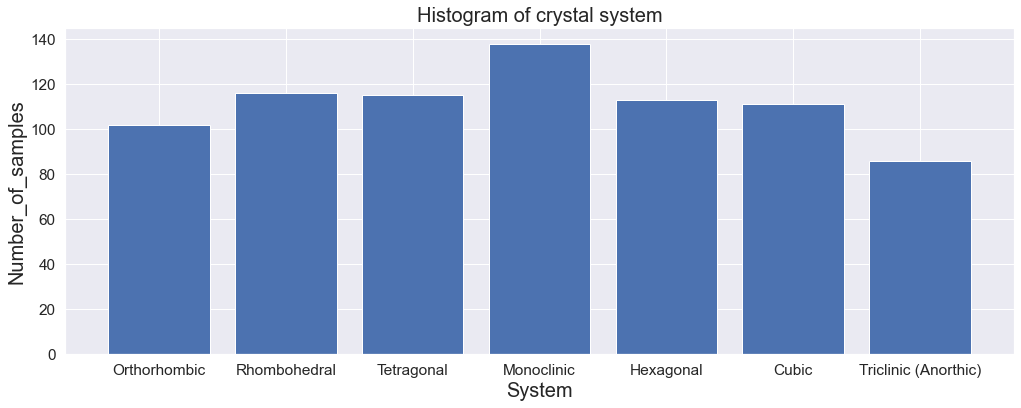

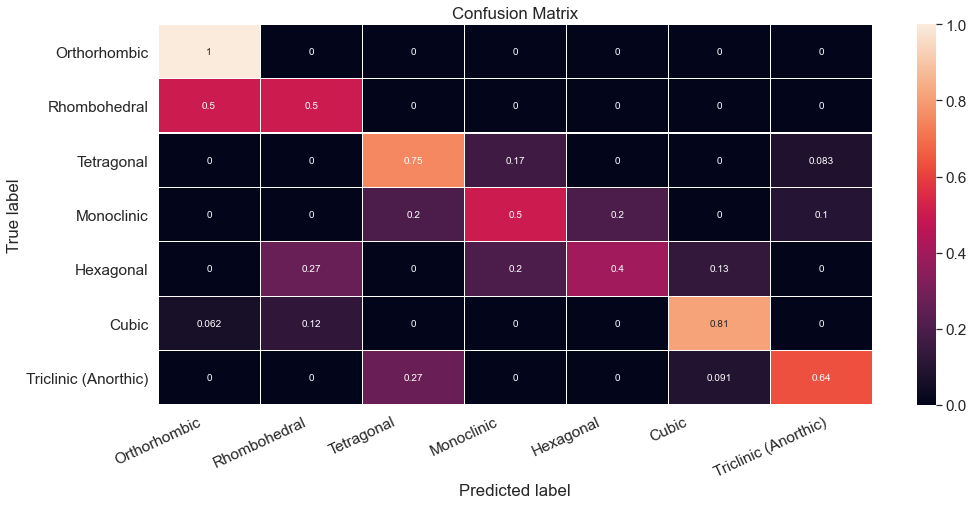

In [92]:
calculations_with_chart(rfc,X_num_four_std,Y_ohe)

In [ ]:
X_highest_reflex = []
for i in X['chart']:
    num_of_reflexes = [0]*len(range_of_two_theta_five_deegres)
    num_of_highest_reflexes = [0]*len(range_of_two_theta_five_deegres)
    for j in i:
        #print(j[0])
        if 0<j[0] and j[0]<= range_of_two_theta_five_deegres[0]:
            num_of_reflexes[0]+=1
            if j[1]>num_of_reflexes[k]:
                        num_of_highest_reflexes[k] = j[0]
        else:
            for k in range(1,33):
                if range_of_two_theta_five_deegres[k-1]<j[0] and j[0]<=range_of_two_theta_five_deegres[k]:
                    num_of_reflexes[k] +=1
                    if j[1]>num_of_reflexes[k]:
                        num_of_highest_reflexes[k] = j[1]

    X_highest_reflex.append(num_of_reflexes+ num_of_highest_reflexes)


In [ ]:
X_the_highest_reflex_and_number_of_reflexes_five_angle = np.array(X_highest_reflex)

In [45]:
ac = []
ac_std = []
f1 = []
f1_std = []
for i in list_of_algorims:
    cross_val_scores(i, X_standarized_list[0], Y_ohe, ac, ac_std, f1,f1_std)

0.52740 accuracy with a standard deviation of 0.05048
0.52262  f1 with a standard deviation of 0.04930
0.58892 accuracy with a standard deviation of 0.07594
0.58224  f1 with a standard deviation of 0.04079
0.48186 accuracy with a standard deviation of 0.03715
0.46913  f1 with a standard deviation of 0.04426
0.41132 accuracy with a standard deviation of 0.07831
0.34385  f1 with a standard deviation of 0.08143
0.51611 accuracy with a standard deviation of 0.07200
0.51245  f1 with a standard deviation of 0.07634


C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

0.54791 accuracy with a standard deviation of 0.04990
0.54472  f1 with a standard deviation of 0.05021


C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users

0.55815 accuracy with a standard deviation of 0.05538
0.55235  f1 with a standard deviation of 0.05405
0.45905 accuracy with a standard deviation of 0.04727
0.44141  f1 with a standard deviation of 0.03797
0.45905 accuracy with a standard deviation of 0.04894
0.44374  f1 with a standard deviation of 0.03892
0.52288 accuracy with a standard deviation of 0.07301
0.52016  f1 with a standard deviation of 0.07282


C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Admin\.conda\envs\pythonProject\lib\site

nan accuracy with a standard deviation of nan
nan  f1 with a standard deviation of nan


C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

0.53425 accuracy with a standard deviation of 0.04988
0.52538  f1 with a standard deviation of 0.04661


C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\svm\_base.py:985: Con

0.51937 accuracy with a standard deviation of 0.04601
0.51158  f1 with a standard deviation of 0.04450
0.45455 accuracy with a standard deviation of 0.04369
0.44320  f1 with a standard deviation of 0.05481
0.47508 accuracy with a standard deviation of 0.06284
0.46648  f1 with a standard deviation of 0.06653


C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\

0.49439 accuracy with a standard deviation of 0.05466
0.49151  f1 with a standard deviation of 0.05749


C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Admin\

0.49553 accuracy with a standard deviation of 0.05594
0.49263  f1 with a standard deviation of 0.05901
0.30313 accuracy with a standard deviation of 0.08550
0.23558  f1 with a standard deviation of 0.08205
0.54674 accuracy with a standard deviation of 0.03226
0.53700  f1 with a standard deviation of 0.02155


C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Admin\.conda\envs\pythonProject\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Varia

In [46]:
ac


[0.5274025974025973,
 0.5889155844155844,
 0.4818571428571429,
 0.4113181818181818,
 0.5161103896103896,
 0.5479090909090909,
 0.5581493506493507,
 0.4590454545454546,
 0.45905194805194804,
 0.5228766233766233,
 nan,
 0.5342532467532468,
 0.5193701298701299,
 0.4545519480519481,
 0.4750779220779221,
 0.4943896103896104,
 0.49553246753246755,
 0.30312987012987014,
 0.5467402597402597]

In [47]:
ac_std

[0.050477814754854106,
 0.07593615883925954,
 0.037152059299641535,
 0.07830837579951179,
 0.07200011712664524,
 0.049899365753965266,
 0.055379869273307444,
 0.04726694966120535,
 0.04894404610554778,
 0.0730144769699254,
 nan,
 0.049882751717135014,
 0.04601211643868174,
 0.04368871704801367,
 0.0628395670125453,
 0.054656910709858286,
 0.0559420035257524,
 0.08549783916926947,
 0.03226107474705987]

In [48]:
f1

[0.52261529822533,
 0.5822429331820007,
 0.46913493409995366,
 0.3438530640991171,
 0.5124459493209376,
 0.5447160991641835,
 0.5523491965154768,
 0.4414103050836931,
 0.4437358121391167,
 0.5201573178108165,
 nan,
 0.5253774228007678,
 0.5115816903083112,
 0.44319604048765565,
 0.4664810810599965,
 0.4915095396595075,
 0.492627069744906,
 0.23558019954250492,
 0.5369998857860004]

In [50]:
f1_std

[0.04929513005648834,
 0.04079434964571743,
 0.044262816577988986,
 0.08142727140276994,
 0.0763364710810618,
 0.050211216827819025,
 0.05405061198268736,
 0.03796986474417054,
 0.03892260633534827,
 0.07282162447825231,
 nan,
 0.04661168880604734,
 0.04450476209331874,
 0.05480830525142248,
 0.06652718403210062,
 0.05748805390544149,
 0.05901017360992002,
 0.082049107526684,
 0.02155057259242235]

In [51]:
list_of_algorims


[SVC(kernel='linear', random_state=4848),
 RandomForestClassifier(),
 DecisionTreeClassifier(),
 GaussianNB(),
 KNeighborsClassifier(),
 LogisticRegression(),
 MLPClassifier(),
 RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ])),
 RidgeClassifier(),
 NearestCentroid(),
 RadiusNeighborsClassifier(),
 LogisticRegressionCV(),
 LinearSVC(),
 ExtraTreeClassifier(),
 LinearDiscriminantAnalysis(),
 LabelPropagation(),
 LabelSpreading(),
 QuadraticDiscriminantAnalysis(),
 BernoulliNB()]